---
## DỮ LIỆU THAM KHẢO
---

In [ ]:
# Xử lý dữ liệu
import pandas as pd
import numpy as np
import ast

# Trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Mô hình
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Tải dataset
credits_link = "https://raw.githubusercontent.com/janettruong/Data-Analysis-Programming/main/tmdb_5000_credits.csv"
movies_link = "https://raw.githubusercontent.com/janettruong/Data-Analysis-Programming/main/tmdb_5000_movies.csv"
ratings_link = "https://raw.githubusercontent.com/janettruong/Data-Analysis-Programming/main/ratings_small.csv"

credits = pd.read_csv(credits_link)
movies = pd.read_csv(movies_link)
ratings = pd.read_csv(ratings_link)

# 1. TIỀN XỬ LÝ


## Đọc dữ liệu
Bộ dữ liệu gồm có hai sheet về phim: Movies & Credits. Sheet còn lại, Ratings là về các lượt đánh giá của người dùng về bộ phim.

In [ ]:
movies.tail(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [ ]:
print("Credits:", credits.shape)
print("Movies:",movies.shape)
print("Ratings:",ratings.shape)

Credits: (4803, 4)
Movies: (4803, 20)
Ratings: (100004, 4)


## Merge Data

In [ ]:
credits_renamed = credits.rename(index=str, columns={"movie_id":"id"})
movies_df_merge = movies.merge(credits_renamed, on="id")
movies_df_merge.rename(columns={'title_x' : 'title'}, inplace=True)
movies_df_merge.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Bỏ các cột không có nhiều ý nghĩa phân tích
movies_cleaned_df = movies_df_merge.drop(columns=['homepage','title_y', 'status','tagline'])
movies_cleaned_df.columns.tolist()

['budget',
 'genres',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew']

In [ ]:
movies_cleaned_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""

## Xử lý dữ liệu định tính
Bộ dữ liệu có chứa nhiều thuộc tính dạng text về phim. Tuy nhiên, các cột này chưa có định dạng phù hợp, ví dụ thuộc tính genres ở mỗi phim có kiểu dữ liệu là string thay vì là list. Ta dùng thư viện ast để xử lý các cột này và chuyển về định dạng phù hợp.

In [ ]:
# Tạo hàm chỉnh định dạng
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

# Sử dụng hàm chỉnh định dạng
movies_cleaned_df['genres']=movies_cleaned_df['genres'].apply(convert)
movies_cleaned_df['keywords']=movies_cleaned_df['keywords'].apply(convert)
movies_cleaned_df['cast']=movies_cleaned_df['cast'].apply(convert)
movies_cleaned_df['production_countries']=movies_cleaned_df['production_countries'].apply(convert)
movies_cleaned_df['production_companies']=movies_cleaned_df['production_companies'].apply(convert)
movies_cleaned_df['spoken_languages']=movies_cleaned_df['spoken_languages'].apply(convert)

# Đọc dữ liệu đã được xử lý
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Đặc biệt, với cột crew, ta chỉ cần thông tin về Director
# Rút trích tên Director từ cột crew
def fetch_director(text):
    L=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            L.append(i['name'])
    return L

movies_cleaned_df['directors']=movies_cleaned_df['crew'].apply(fetch_director)
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,directors
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton]


In [ ]:
movies_cleaned_df.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,directors
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton]


## Xử lý missing values

In [ ]:
# THÔNG TIN CHI TIẾT BỘ DỮ LIỆU MOVIES
print ('CHI TIẾT BỘ DỮ LIỆU MOVIES')
print(movies_cleaned_df.info(), '\n')
print (     'Số lượng phần tử bộ dữ liệu', movies_cleaned_df.size, '\n')
print (     'Số lượng dòng và cột của bộ dữ liệu', movies_cleaned_df.shape)

CHI TIẾT BỘ DỮ LIỆU MOVIES
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  title                 4803 non-null   object 

In [ ]:
print("\nBỘ DỮ LIỆU MOVIES TRƯỚC KHI XỬ LÝ MISSING VALUES")
print(movies_cleaned_df.isnull().sum())
null_count = movies_cleaned_df.isnull().sum().sum()
print("Số lượng giá trị Null trong Movies:", null_count)


BỘ DỮ LIỆU MOVIES TRƯỚC KHI XỬ LÝ MISSING VALUES
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
directors               0
dtype: int64
Số lượng giá trị Null trong Movies: 6


Có vẻ như số missing value của bộ dữ liệu là không nhiều. Ta kiểm tra bằng cách tính phần trăm missing value của từng cột. Nếu phần trăm số dòng có missing value bé hơn 95% bộ dữ liệu thì ta có thể loại bỏ các dòng đó.

In [ ]:
null_threshold_percentage = 95

# Tính ngưỡng dựa trên phần trăm
threshold = (null_threshold_percentage / 100) * len(movies_cleaned_df.columns)

# Đếm số dòng ban đầu
initial_rows = len(movies_cleaned_df)

# Loại bỏ các dòng có số lượng giá trị null ít hơn ngưỡng
movies_cleaned_df.dropna(thresh=threshold, inplace=True)

# Đếm số dòng sau khi loại bỏ
rows_removed = initial_rows - len(movies_cleaned_df)

# Hiển thị số dòng đã bị loại bỏ
print(f"Số dòng đã bị loại bỏ: {rows_removed} trên tổng số {initial_rows} ({rows_removed / initial_rows * 100:.2f}%)")


Số dòng đã bị loại bỏ: 2 trên tổng số 4803 (0.04%)


In [ ]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4801 non-null   int64  
 1   genres                4801 non-null   object 
 2   id                    4801 non-null   int64  
 3   keywords              4801 non-null   object 
 4   original_language     4801 non-null   object 
 5   original_title        4801 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4801 non-null   float64
 8   production_companies  4801 non-null   object 
 9   production_countries  4801 non-null   object 
 10  release_date          4800 non-null   object 
 11  revenue               4801 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4801 non-null   object 
 14  title                 4801 non-null   object 
 15  vote_average         

##Xử lý giá trị 0

Có vẻ như dữ liệu chứa rất nhiều giá trị 0 ở các cột như revenue, budget. Tuy nhiên, theo lý thuyết thì doanh thu, chi phí không thể có giá trị bằng 0 được. Vậy nên ta điều tra số giá trị 0 trong các cột và thực hiện điền giá trị hoặc loại bỏ dòng.

In [ ]:
print("Số giá trị 0 trong cột:")
(movies_cleaned_df[['budget', 'revenue']] == 0).sum()

Số giá trị 0 trong cột:


budget     1037
revenue    1425
dtype: int64

Nếu giá trị 0 trong cột >5%, ta tiến hành điền giá trị bằng giá trị trung bình của cột. Ngược lại, ta có thể loại bỏ dòng có giá trị 0.

In [ ]:
# Tính tỷ lệ giá trị 0 trên mỗi cột
zero_percentage = (movies_cleaned_df[['budget', 'revenue']] == 0).mean() * 100

# In ra tỷ lệ giá trị 0 trên mỗi cột
for column, percentage in zero_percentage.items():
    print(f"Tỷ lệ giá trị 0 trong cột '{column}': {percentage:.2f}%")
    if percentage > 5:
        print(f"Cột '{column}' có tỷ lệ giá trị 0 lớn hơn 5%")

Tỷ lệ giá trị 0 trong cột 'budget': 21.60%
Cột 'budget' có tỷ lệ giá trị 0 lớn hơn 5%
Tỷ lệ giá trị 0 trong cột 'revenue': 29.68%
Cột 'revenue' có tỷ lệ giá trị 0 lớn hơn 5%


In [ ]:
# Xử lý các cột định lượng được chọn
for column in ['budget', 'revenue']:
    # Nếu tỷ lệ giá trị 0 lớn hơn 5%, sử dụng mean để impute
    movies_cleaned_df[column] = movies_cleaned_df[column].replace(0, movies_cleaned_df[column].mean())

## Xử lý outlier

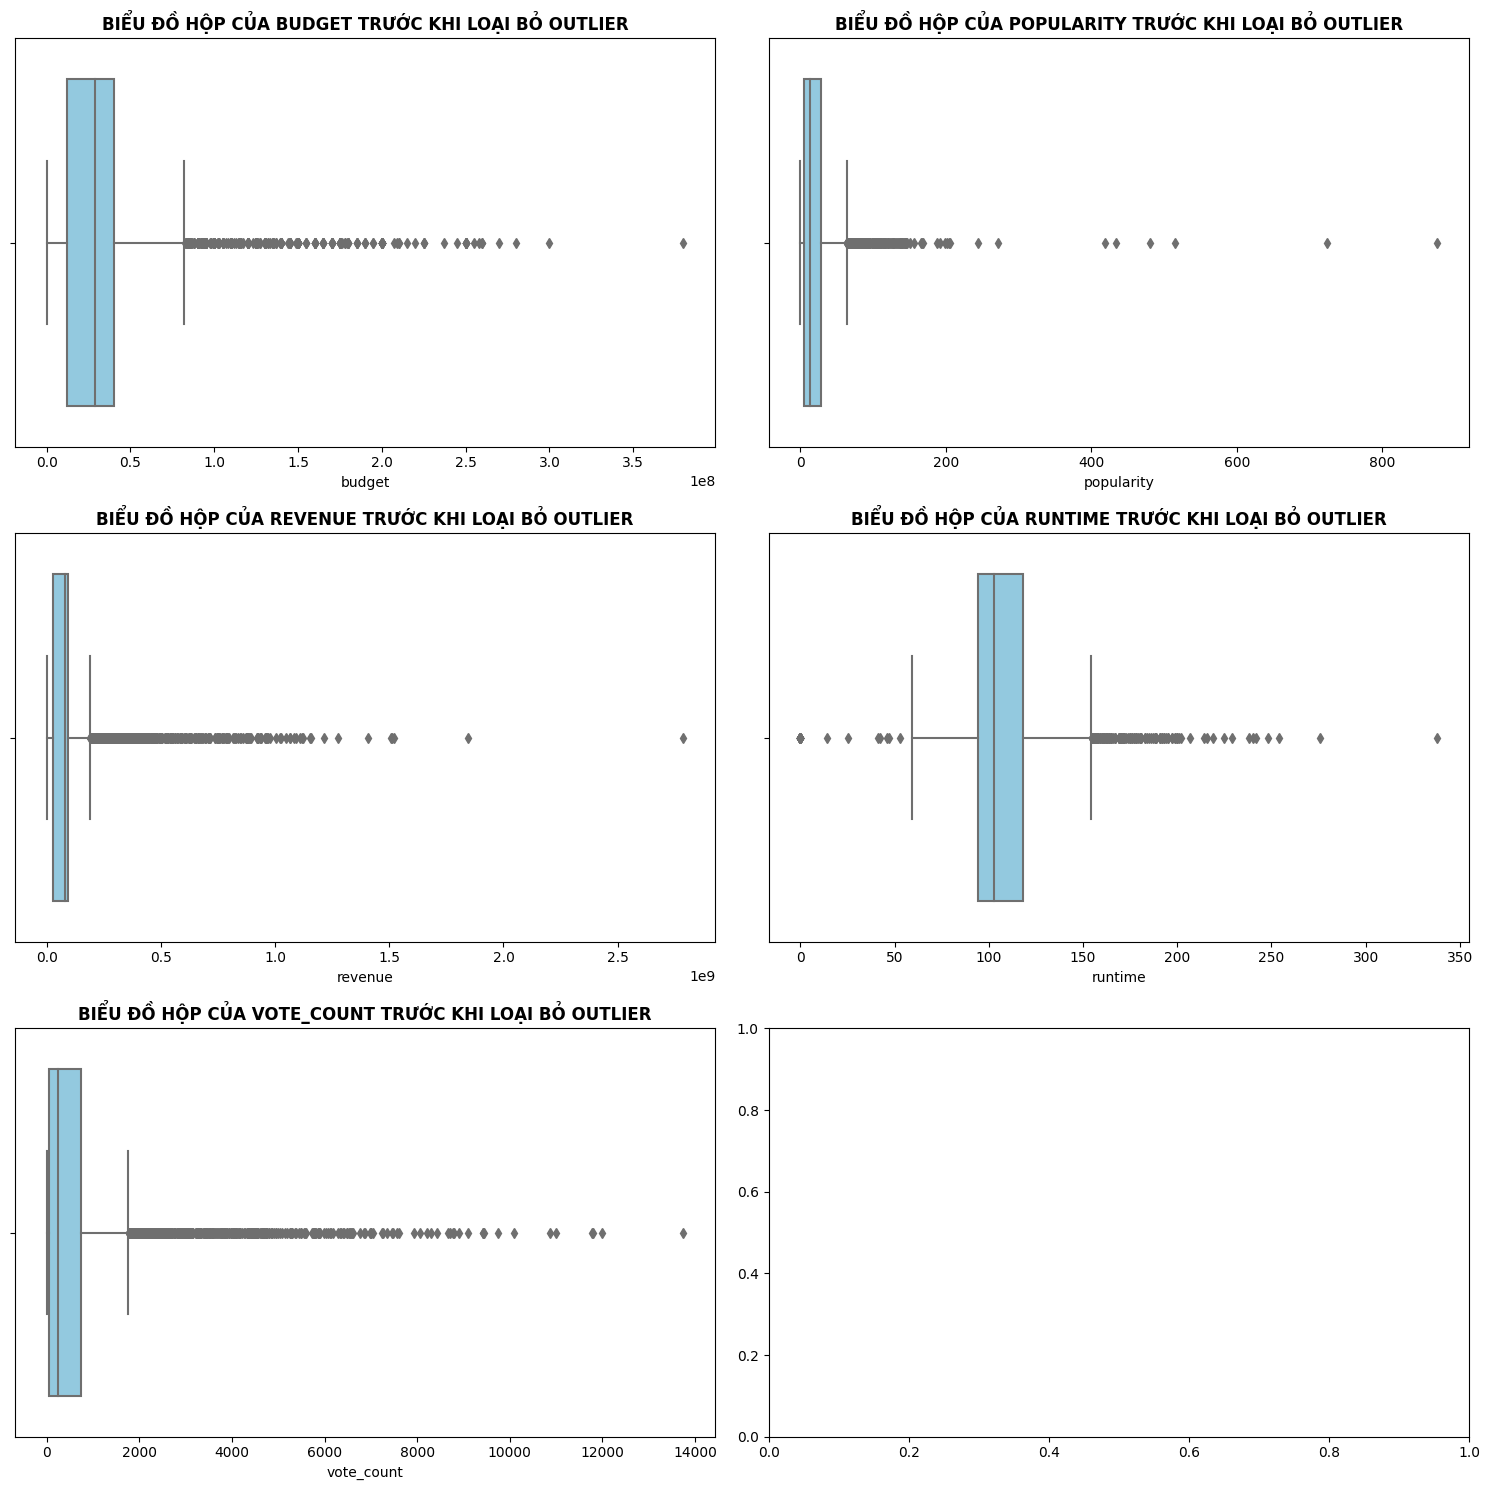

In [ ]:
# Kiểm tra dữ liệu nhiễu thông qua biểu đồ dạng Boxplot

# Lọc các biến định tính
numerical_movies = list(movies_cleaned_df.select_dtypes(include=['int64', 'float64']).columns)

# Loại bỏ cột 'id'
numerical_movies.remove('id')

# biến vote_average nằm trong khoảng 0-10 nên ta không loại outliers ở biến này
numerical_movies.pop(4)

# Tạo lưới subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 3 * 5))

# Lặp qua từng cột và vẽ boxplot trong từng ô subplot
for i, column in enumerate(numerical_movies):
    row_index = i // 2  # Dòng của ô subplot
    col_index = i % 2   # Cột của ô subplot
    sns.boxplot(x=movies_cleaned_df[column], ax=axes[row_index, col_index], color='skyblue')
    axes[row_index, col_index].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()} TRƯỚC KHI LOẠI BỎ OUTLIER', fontsize=12, fontweight='bold')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()


In [ ]:
# Xử lý outlier bằng phương pháp IQR

# Lưu số dòng ban đầu của DataFrame movies
initial_rows = len(movies_cleaned_df)

# Lặp qua từng cột trong numerical_movies
for column in numerical_movies:
    # Tính Q1 và Q3
    Q1 = movies_cleaned_df[column].quantile(0.25)
    Q3 = movies_cleaned_df[column].quantile(0.75)

    # Tính IQR
    IQR = Q3 - Q1

    # Tính giới hạn dưới và giới hạn trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đếm số lượng outlier trước khi loại bỏ
    outliers_before_removal = ((movies_cleaned_df[column] < lower_bound) | (movies_cleaned_df[column] > upper_bound)).sum()

    # Loại bỏ giá trị ngoài IQR trong DataFrame movies
    movies_cleaned_df = movies_cleaned_df[~((movies_cleaned_df[column] < lower_bound) | (movies_cleaned_df[column] > upper_bound))]

    # Đếm số lượng outlier sau khi loại bỏ
    outliers_after_removal = ((movies_cleaned_df[column] < lower_bound) | (movies_cleaned_df[column] > upper_bound)).sum()

    # Hiển thị thông tin về số lượng outlier đã bị loại bỏ cho cột hiện tại
    print(f"Số outlier đã bị loại bỏ trong cột '{column}': {outliers_before_removal} trước và {outliers_after_removal} sau")

# Hiển thị số dòng đã được xử lý
rows_removed = initial_rows - len(movies_cleaned_df)
percentage_removed = (rows_removed / initial_rows) * 100
print(f"Tổng số dòng đã bị loại bỏ: {rows_removed} trên tổng số {initial_rows} ({percentage_removed:.2f}%)")


Số outlier đã bị loại bỏ trong cột 'budget': 419 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'popularity': 211 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'revenue': 239 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'runtime': 170 trước và 0 sau
Số outlier đã bị loại bỏ trong cột 'vote_count': 272 trước và 0 sau
Tổng số dòng đã bị loại bỏ: 1311 trên tổng số 4801 (27.31%)


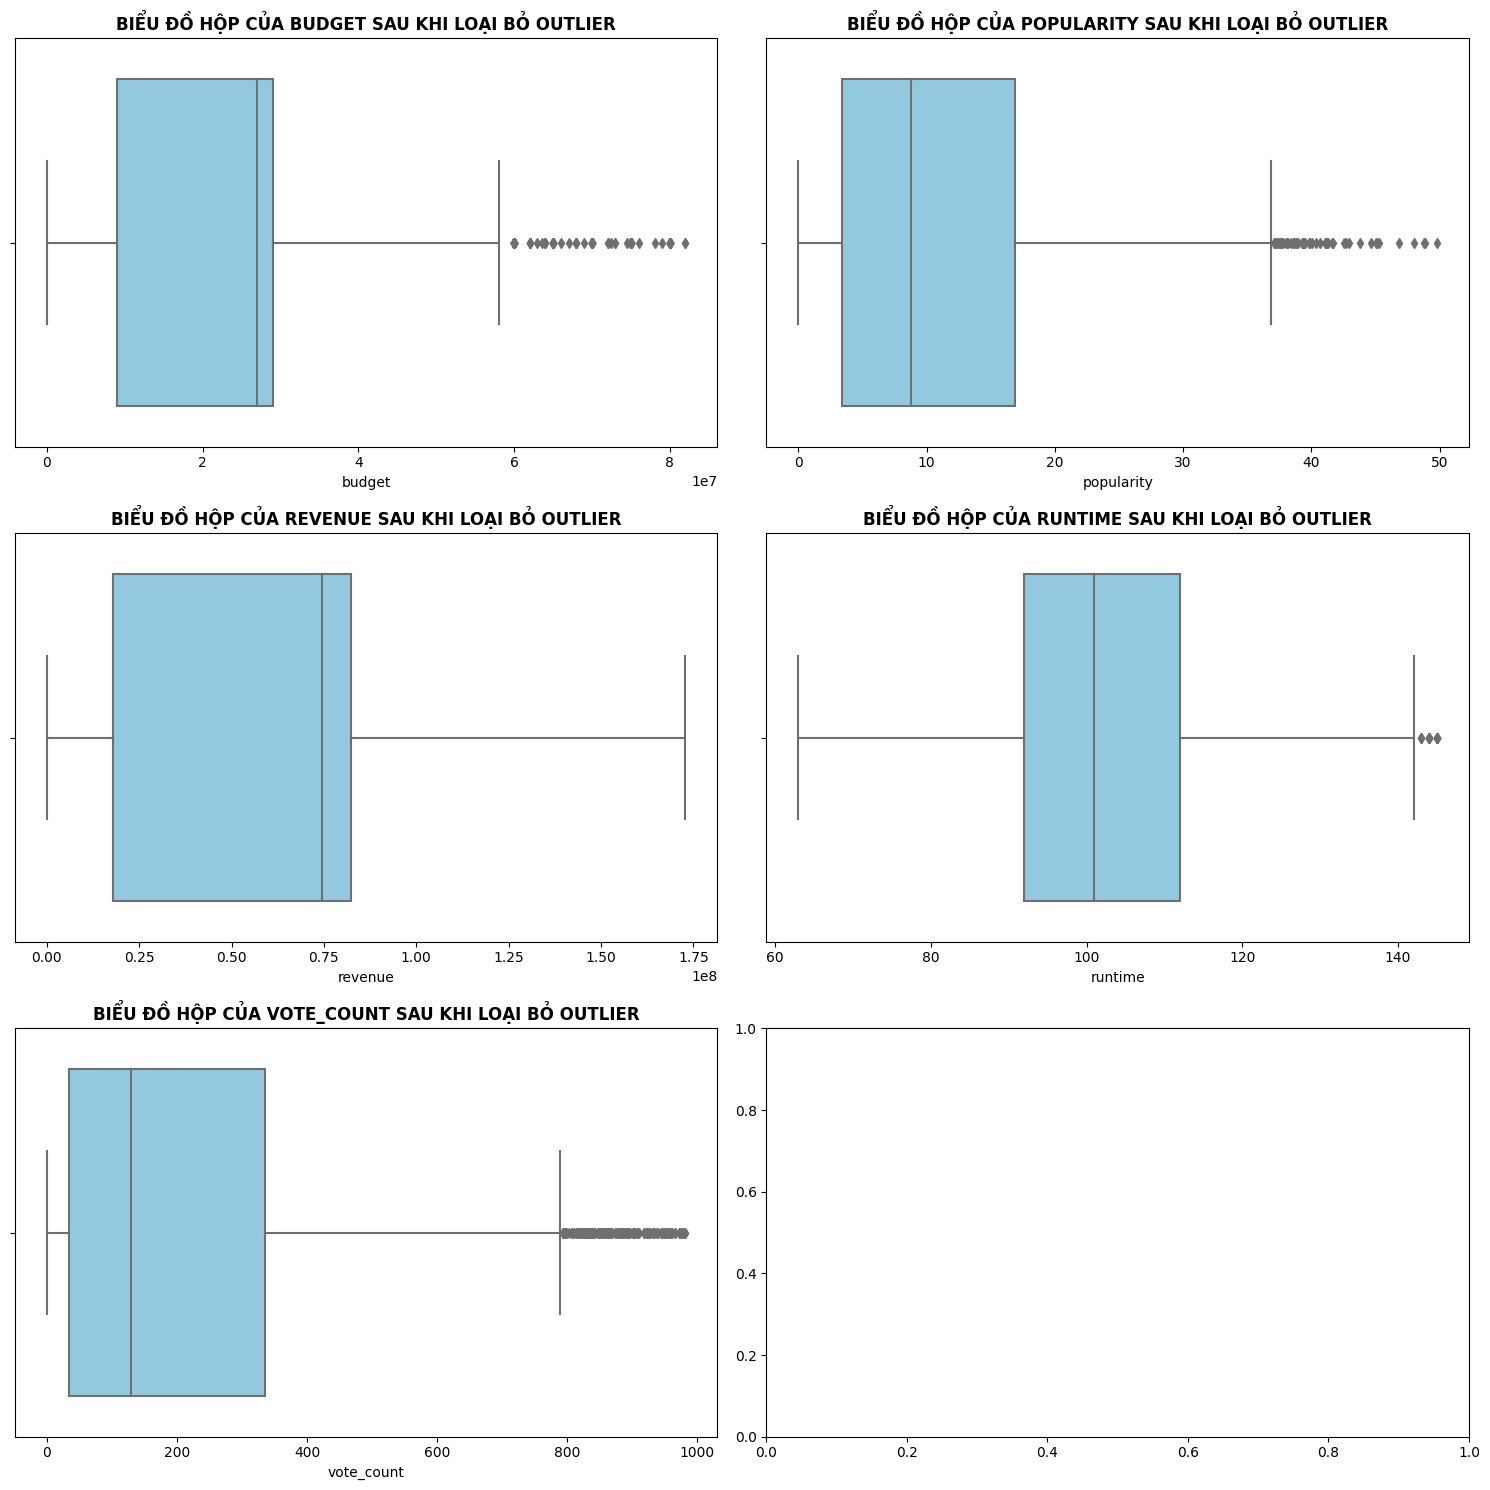

In [ ]:
# Tạo lưới subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 3 * 5))

# Lặp qua từng cột và vẽ boxplot trong từng ô subplot
for i, column in enumerate(numerical_movies):
    row_index = i // 2  # Dòng của ô subplot
    col_index = i % 2   # Cột của ô subplot

    sns.boxplot(x=movies_cleaned_df[column], ax=axes[row_index, col_index], color='skyblue')
    axes[row_index, col_index].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()} SAU KHI LOẠI BỎ OUTLIER', fontsize=12, fontweight='bold')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
movies_cleaned_df.shape

(3490, 20)

In [ ]:
movies = movies_cleaned_df

In [ ]:
movies.revenue

83      8.229491e+07
97      7.700000e+07
265     8.229491e+07
302     1.400734e+08
314     1.383513e+07
            ...     
4798    2.040920e+06
4799    8.229491e+07
4800    8.229491e+07
4801    8.229491e+07
4802    8.229491e+07
Name: revenue, Length: 3490, dtype: float64

# 2. THỐNG KÊ MÔ TẢ - MAI

## Phân tích tổng quan

In [ ]:
numerical_movies = ['budget','popularity','revenue','runtime','vote_count','vote_average']

In [ ]:
numerical_movies = movies[numerical_movies]

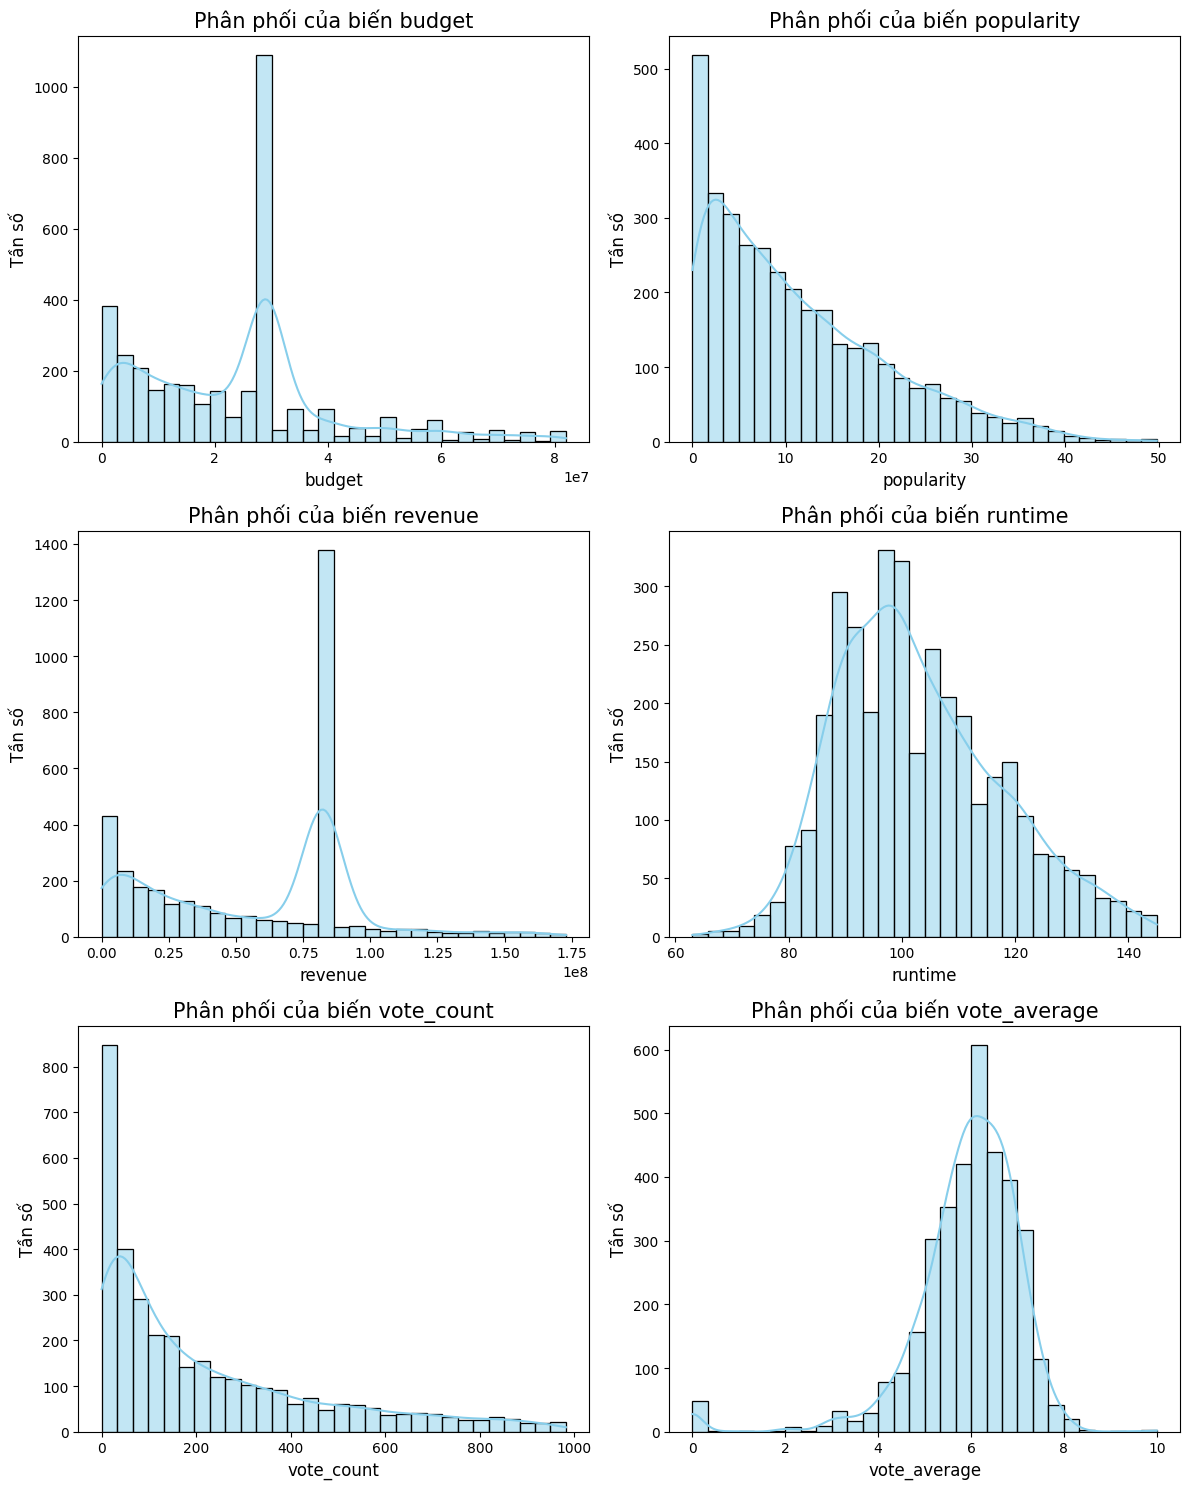

In [ ]:
# Tạo lưới subplot với 2 cột và 3 dòng
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Lặp qua từng cột và vẽ distribution plot trong từng ô subplot
for i, column in enumerate(numerical_movies.columns):
    row_index = i // 2  # Dòng của ô subplot
    col_index = i % 2   # Cột của ô subplot

    plt.sca(axes[row_index, col_index])
    sns.histplot(numerical_movies[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Phân phối của biến {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Tần số', fontsize=12)

# Tinh chỉnh layout
plt.tight_layout()
plt.show()


Có thể thấy, các biến định lượng đều có phân phối lệch, với phần lớn các biến có phân phối là lệch trái.

In [ ]:
movies[movies['original_title'] == 'Supernova']

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,directors


## Thống kê biến định lượng

In [ ]:
# Chọn chỉ các cột có giá trị số
numerical_movies = movies.select_dtypes(include=['int64', 'float64'])

# Tạo một danh sách rỗng để lưu chuỗi bảng
tables = []

# Lặp qua các cột số
for column in numerical_movies.columns:
    std = numerical_movies[column].std(ddof=1)
    stats_table = numerical_movies[column].describe().reset_index().rename(columns={'index': 'Statistic'})
    stats_table = tabulate(stats_table, headers='keys', tablefmt='pretty', showindex=False)

    # Thêm bảng vào danh sách
    tables.append(f"Thống kê mô tả cột '{column}':\n{stats_table}\nPhương sai cho cột '{column}': {std:.2f}\n" + "=" * 50)

# In từng bảng
for table in tables:
    print(table)


Thống kê mô tả cột 'budget':
+-----------+--------------------+
| Statistic |       budget       |
+-----------+--------------------+
|   count   |       3490.0       |
|   mean    | 23602954.418334946 |
|    std    | 17130471.495504115 |
|    min    |        1.0         |
|    25%    |     9000000.0      |
|    50%    |     27000000.0     |
|    75%    | 29054015.10497813  |
|    max    |     82000000.0     |
+-----------+--------------------+
Phương sai cho cột 'budget': 17130471.50
Thống kê mô tả cột 'id':
+-----------+--------------------+
| Statistic |         id         |
+-----------+--------------------+
|   count   |       3490.0       |
|   mean    | 56553.485673352436 |
|    std    | 88103.08061823367  |
|    min    |        5.0         |
|    25%    |      9816.75       |
|    50%    |      15798.5       |
|    75%    |      52708.0       |
|    max    |      447027.0      |
+-----------+--------------------+
Phương sai cho cột 'id': 88103.08
Thống kê mô tả cột 'popularity'

## Tương quan giữa các biến

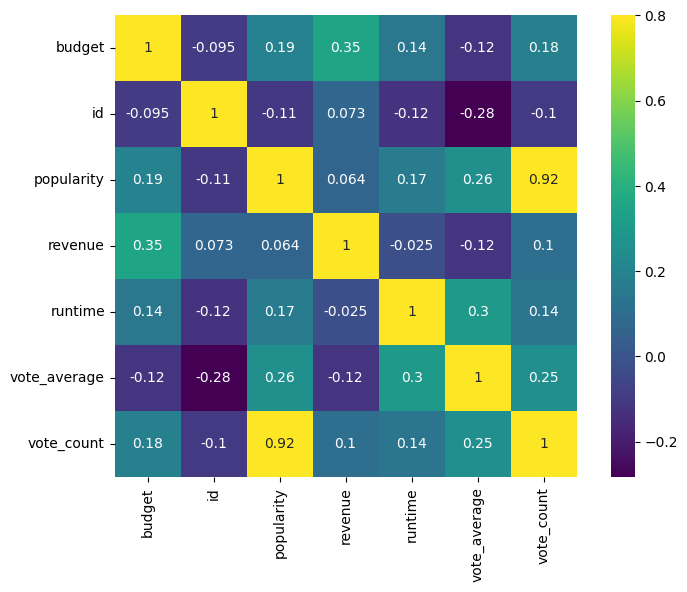

In [ ]:
# Tạo ma trận tương quan

correlation_matrix = numerical_movies.corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, vmax=0.8, square=True, cmap="viridis", annot=True)

plt.show()

Doanh thu có tương quan mạnh với số lượng đánh giá, chi phí và độ phổ biến.
Đáng chú ý, chi phí có tương quan thấp với đánh giá trung bình.
Độ phổ biến có tương quan cao nhất với số lượng đánh giá, cho thấy khán giả thường sẽ đánh giá cho phim mà họ thích.
Số lượng đánh giá có tương quan cao với doanh thu và độ phổ biến.

## Phân tích theo Genre

Thể loại là một trong những yếu tố góp phần phân loại bộ phim. Trong bộ dữ liệu, mỗi phim sẽ có nhiều thể loại khác nhau được lưu trữ dưới dạng danh sách. Để phân tích theo thể loại, ta tiến hành tạo dataframe mới mang tên "genre".

**Tạo bảng theo genre**

In [ ]:
# Đếm số lần xuất hiện của mỗi thể loại
genre_counts = {}

# Lặp qua từng dòng trong cột 'genres'
for genres_list in movies['genres']:
    # Lặp qua danh sách các thể loại
    for genre in genres_list:
        # Đếm số lần xuất hiện của mỗi thể loại
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

**Tần số theo Genre**

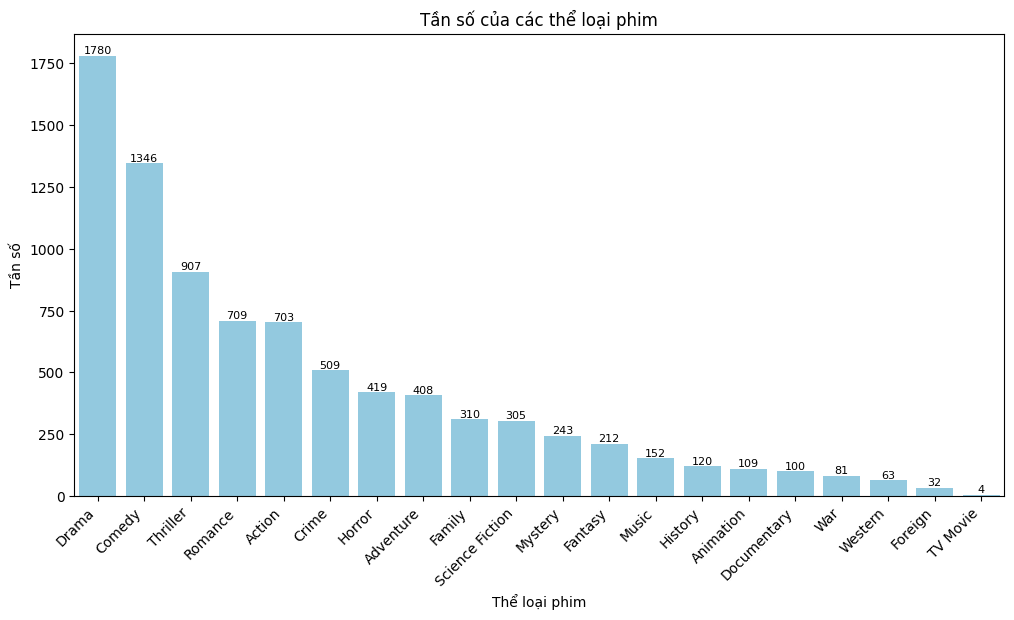

In [ ]:
# Sắp xếp genre_counts theo tần số giảm dần
sorted_genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}

# Tạo biểu đồ cột với khoảng trắng giữa các cột
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=list(sorted_genre_counts.keys()), y=list(sorted_genre_counts.values()), color='skyblue', errorbar=None, dodge=True)
plt.xticks(rotation=45, ha='right')  # Đặt góc xoay và canh giữa để tránh trùng lên nhau
plt.xlabel('Thể loại phim')
plt.ylabel('Tần số')
plt.title('Tần số của các thể loại phim')

# Thêm giá trị trên cột
for i, v in enumerate(sorted_genre_counts.values()):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()


In [ ]:
genres_count = pd.Series(genre_counts )
genres_count.sort_values()

TV Movie              4
Foreign              32
Western              63
War                  81
Documentary         100
Animation           109
History             120
Music               152
Fantasy             212
Mystery             243
Science Fiction     305
Family              310
Adventure           408
Horror              419
Crime               509
Action              703
Romance             709
Thriller            907
Comedy             1346
Drama              1780
dtype: int64

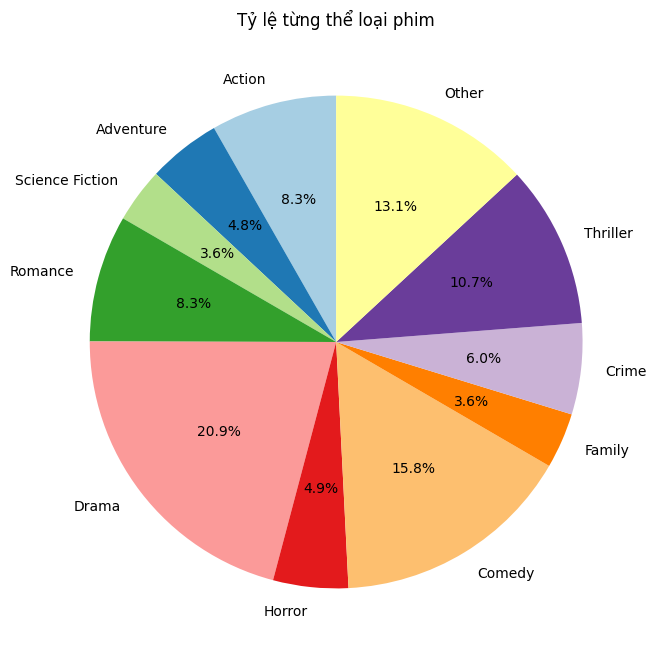

In [ ]:
# Calculate the percentage of each category
category_percentages = genres_count / genres_count.sum()

# Identify categories below 5% of the total
mask = category_percentages < 0.03
small_cat_totals = genres_count[mask]
big_cat_totals = genres_count[~mask]

# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(big_cat_totals)))
big_cat_totals.plot(kind="pie", colors=colors, autopct='%1.1f%%', label="", startangle=90)
plt.title("Tỷ lệ từng thể loại phim", fontsize=12)
plt.show()

Có thể thấy, hai thể loại được sản xuất nhiều nhất là Drama và Comedy. Điều này có đồng nghĩa với doanh thu cao hơn và đánh giá cao hơn từ người dùng không?

**Thêm cột vào bảng genre**

Để phân tích sâu hơn về thể loại, nhóm thêm các cột mới vào dataframe genre. Với mỗi bộ phim sẽ đi kèm danh sách thể loại, các cột mới 'Avg_Vote_Count', 'Avg_Vote_Average', 'Avg_Popularity', 'Avg_Budget', 'Avg_Revenue' được tính bằng cách tính trung bình các cột của các phim thuộc thể loại đó.

In [ ]:
# Ánh xạ các giá trị trung bình vào DataFrame 'genres_df'

# Khởi tạo DataFrame mới để chứa giá trị trung bình
genres_df = pd.DataFrame(columns=['genre', 'frequency', 'avg vote count', 'avg vote average', 'avg popularity', 'avg budget', 'avg revenue','avg runtime'])

for genre_name in genre_counts.keys():
    # Lọc các dòng trong DataFrame 'movies' mà chứa thể loại 'genre_name'
    genre_movies = movies[movies['genres'].apply(lambda x: genre_name in x)]

    # Tính giá trị trung bình
    avg_vote_count = genre_movies['vote_count'].mean()
    avg_vote_average = genre_movies['vote_average'].mean()
    avg_popularity = genre_movies['popularity'].mean()
    avg_budget = genre_movies['budget'].mean()
    avg_revenue = genre_movies['revenue'].mean()
    avg_runtime = genre_movies['runtime'].mean()

    # Tính frequency (số lần xuất hiện)
    frequency = genre_counts[genre_name]

    # Thêm vào DataFrame 'genres_df'
    genres_df = genres_df.append({'genre': genre_name, 'frequency': frequency, 'avg vote count': avg_vote_count, 'avg vote average': avg_vote_average, 'avg popularity': avg_popularity, 'avg budget': avg_budget, 'avg revenue': avg_revenue, 'avg runtime': avg_runtime}, ignore_index=True)

genres_df.style.background_gradient()


,genre,frequency,avg vote count,avg vote average,avg popularity,avg budget,avg revenue,avg runtime
0,Action,703,259.809388,5.708677,13.192171,29103439.025849,55662454.331513,103.802276
1,Adventure,408,269.068627,5.858578,13.661942,32078825.971835,61642902.691934,104.409314
2,Science Fiction,305,284.065574,5.643279,13.868323,25699235.008750,51517941.236305,99.931148
3,Romance,709,205.826516,6.095487,10.304024,23391397.559563,56341161.267204,105.682652
4,Drama,1780,196.173034,6.234607,10.224808,22120608.203906,53912712.264505,107.875843
5,Horror,419,272.727924,5.473986,13.166690,18149254.268241,55676797.963712,95.856802
6,Comedy,1346,217.480684,5.830238,10.778361,24372880.665280,58744200.601689,99.014859
7,Fantasy,212,288.462264,5.823113,14.083358,30478006.762354,58786098.957283,100.202830
8,Family,310,208.712903,5.743548,10.979849,31074398.558316,67799811.570928,95.345161
9,Animation,109,233.834862,6.003670,13.096106,32712286.985454,63677817.990111,86.733945


Mặc dù là hai thể loại phim được sản xuất nhiều nhất, Drama và Comedy không thuộc nhóm thể loại dẫn đầu về đánh giá lẫn doanh thu trung bình theo phim.

**Tương quan theo Genre**

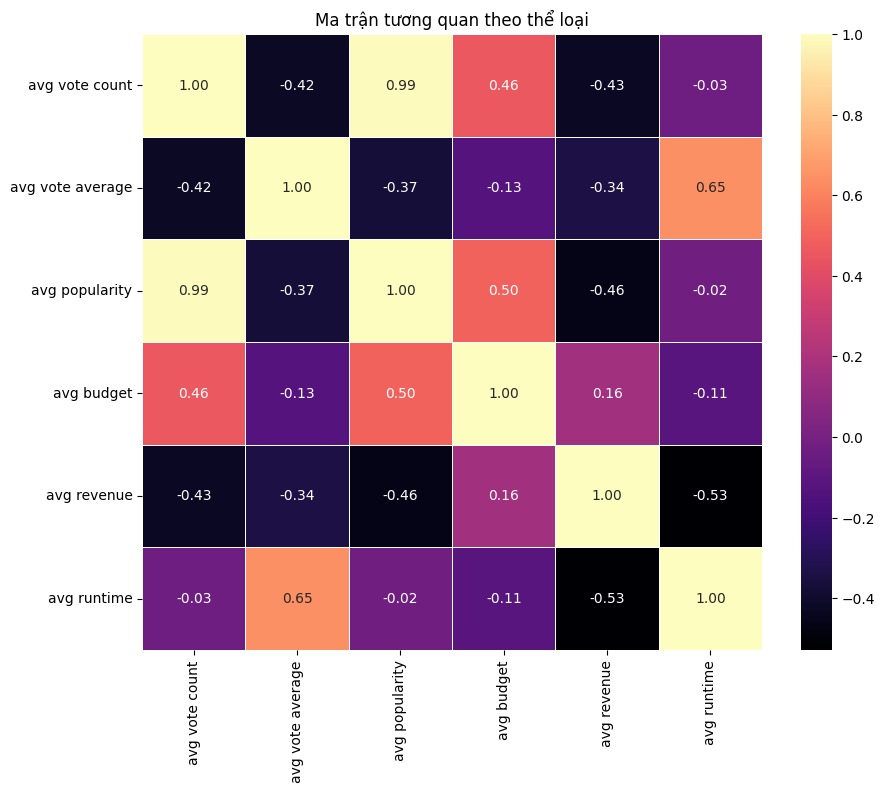

In [ ]:
# Tính ma trận tương quan
correlation_matrix = genres_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Ma trận tương quan theo thể loại')
plt.show()

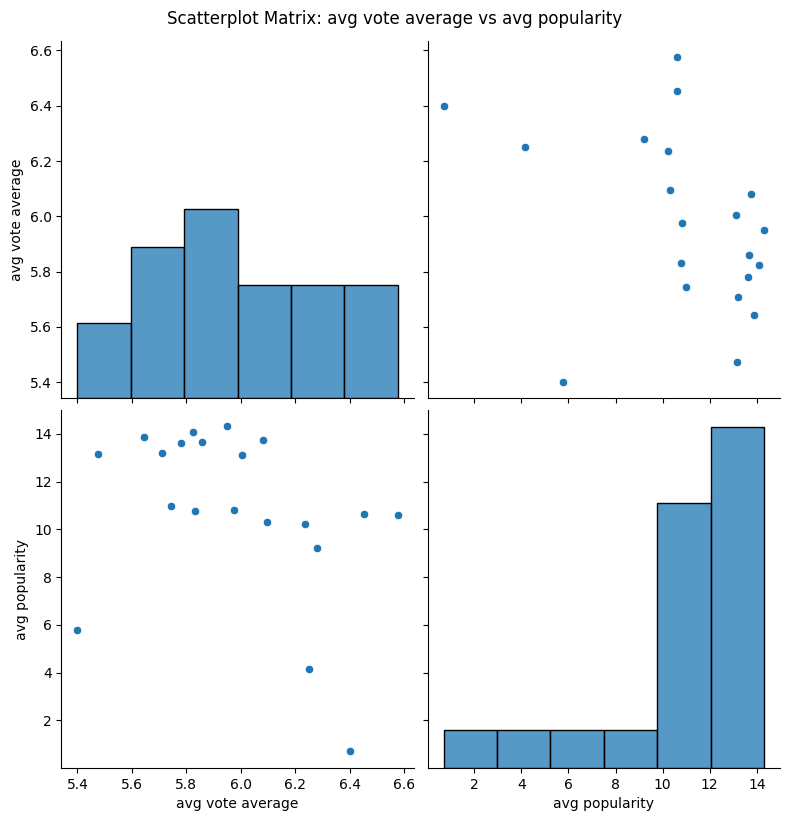

In [ ]:
# Scatterplot matrix giữa 'avg vote average' và 'avg popularity'
scatter_matrix = sns.pairplot(genres_df, vars=['avg vote average', 'avg popularity'], height=4)

# Đặt tên cho các trục và tiêu đề
scatter_matrix.fig.suptitle("Scatterplot Matrix: avg vote average vs avg popularity", y=1.02)
plt.show()

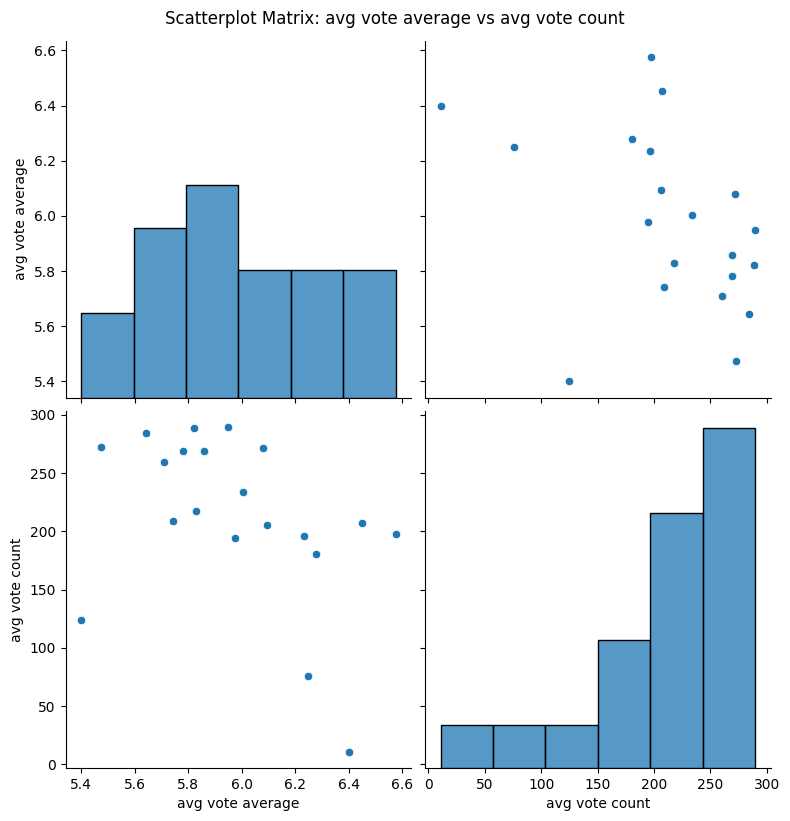

In [ ]:
# Scatterplot matrix giữa 'avg vote average' và 'avg vote count'
scatter_matrix = sns.pairplot(genres_df, vars=['avg vote average', 'avg vote count'], height=4)

# Đặt tên cho các trục và tiêu đề
scatter_matrix.fig.suptitle("Scatterplot Matrix: avg vote average vs avg vote count", y=1.02)
plt.show()

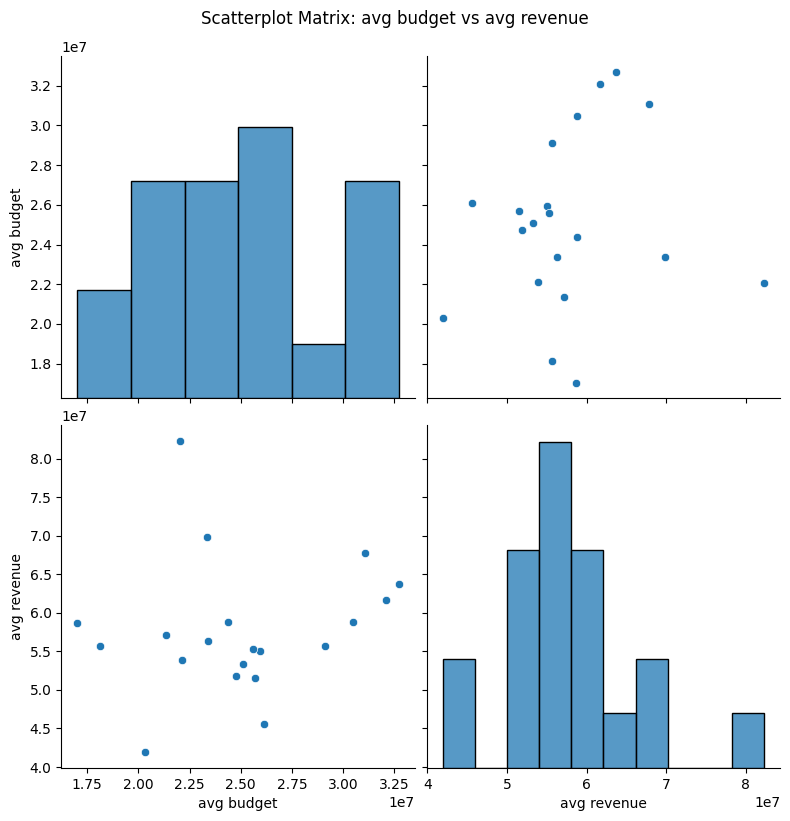

In [ ]:
# Scatterplot matrix giữa 'avg budget' và 'avg revenue'
scatter_matrix_budget_revenue = sns.pairplot(genres_df, vars=['avg budget', 'avg revenue'], height=4)

# Đặt tên cho các trục và tiêu đề
scatter_matrix_budget_revenue.fig.suptitle("Scatterplot Matrix: avg budget vs avg revenue", y=1.02)
plt.show()

**Thời lượng trung bình theo Genre**

In [ ]:
genres_df.columns

Index(['genre', 'frequency', 'avg vote count', 'avg vote average',
       'avg popularity', 'avg budget', 'avg revenue', 'avg runtime'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

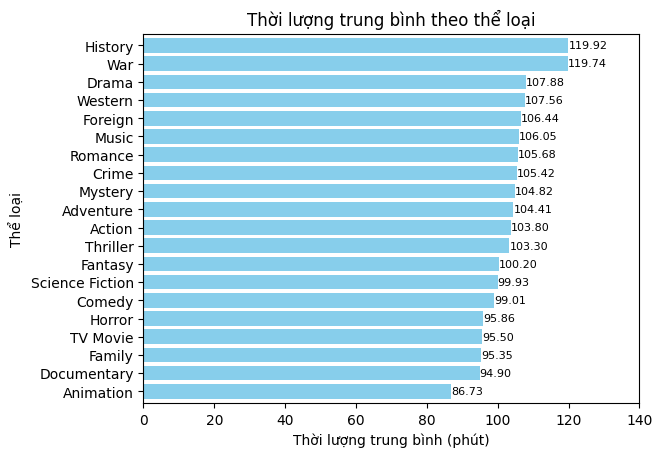

In [ ]:
genres_df.sort_values(by='avg runtime', ascending=True, inplace=True)

plt.figure(figsize=(10, 8))
ax = genres_df[['avg runtime']].plot(kind='barh', stacked=True, legend=False, color='skyblue', width=0.8)
ax.set_yticklabels(genres_df['genre'])
plt.title('Thời lượng trung bình theo thể loại')
plt.xlabel('Thời lượng trung bình (phút)')
plt.ylabel('Thể loại')
plt.xlim(0, 140)  # Đặt giới hạn trục x từ 0 đến 140

# Thêm label cho từng cột
for idx, value in enumerate(genres_df['avg runtime']):
    plt.text(value, idx, f'{value:.2f}', ha='left', va='center', fontsize=8, color='black')

plt.show()

## Phân tích theo Budget and Revenue

In [ ]:
# Tính tương quan giữa 2 biến 'budget' và 'revenue'
corr_coef = movies['budget'].corr(movies['revenue'])
print (corr_coef)

0.34982126514570644


Tương quan giữa 2 biến budget và revenue không có sự tương quan mạnh


Nghĩa là chi phí bỏ ra cho việc làm phim chưa hẳn là sẽ mang lại doanh thu cao

Để thể hiện rõ điều này, nhóm tiến hành vẽ Scatter plot dựa trên 2 biến 'budget' và 'revenue' để có thể quan sát rõ sự tương quan của 2 biến



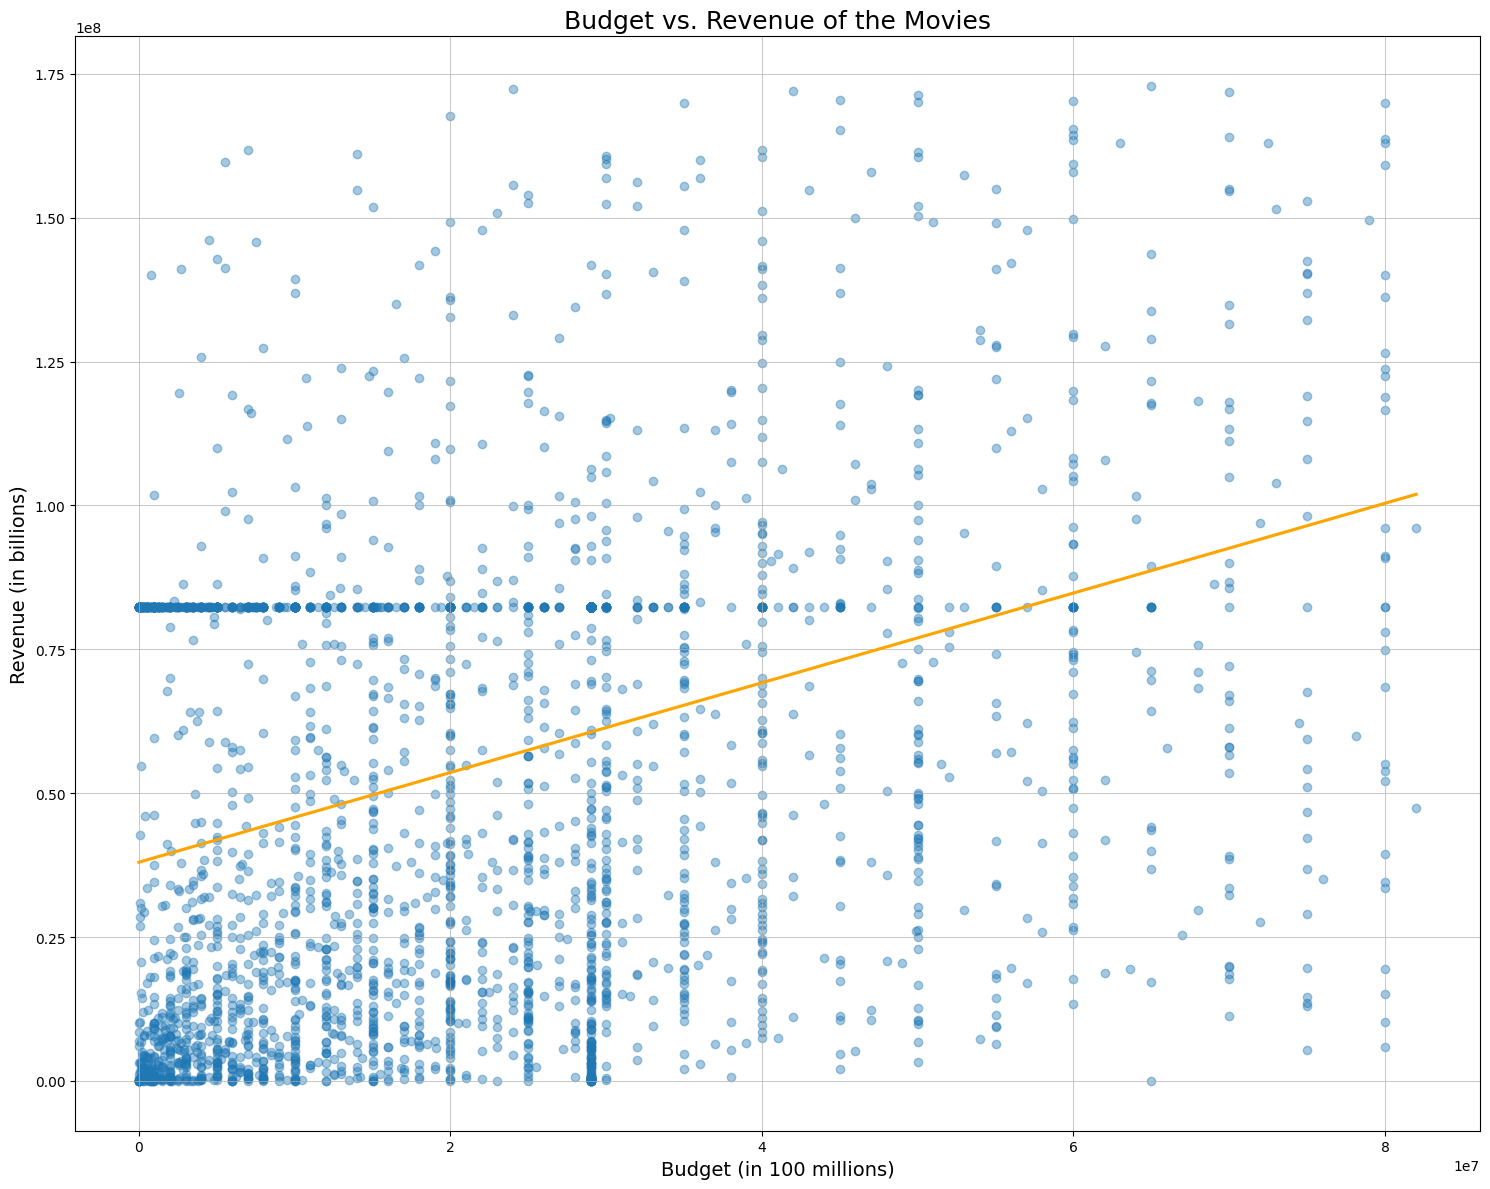

In [ ]:

plt.figure(figsize=(15, 12))
sns.regplot(x=movies['budget'], y=movies['revenue'], scatter_kws={'alpha':0.4}, line_kws={'color':'orange'}, ci=None)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.title('Budget vs. Revenue of the Movies', fontsize=18)
plt.xlabel('Budget (in 100 millions)', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.tight_layout()
plt.show()

Từ biểu đồ trên cho ta thấy, 'budget' - chi phí cho việc làm phim và 'revenue' - lợi nhuận thu được không có sự tương quan mạnh

Chính vì vậy, chi phí cho việc làm phim cao chưa hẳn đã mang lại lợi nhuận tốt cho doanh nghiệp


In [ ]:
movies['profit']= movies['revenue'] - movies ['budget']

In [ ]:
# Tính tương quan giữa 2 biến 'budget' và 'profit'
corr_coef_pro = movies['budget'].corr(movies['profit'])
print (corr_coef_pro)

-0.10505528169591744


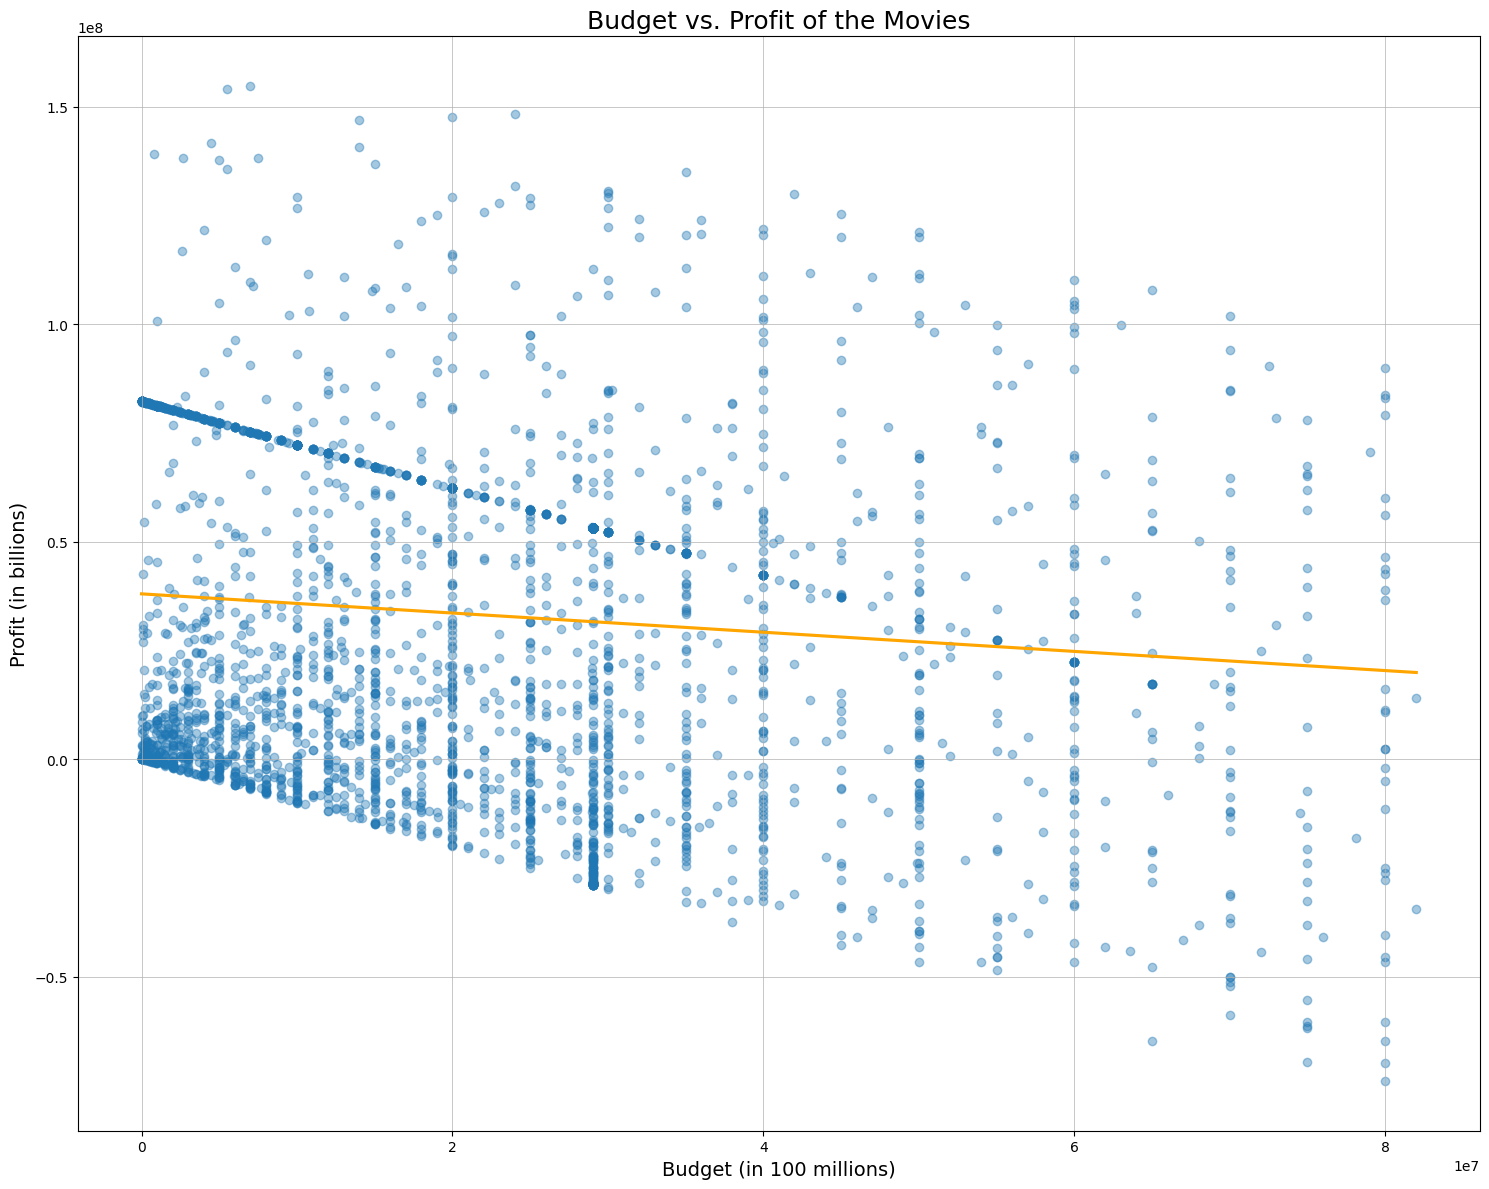

In [ ]:

plt.figure(figsize=(15, 12))
sns.regplot(x=movies['budget'], y=movies['profit'], scatter_kws={'alpha':0.4}, line_kws={'color':'orange'}, ci=None)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.title('Budget vs. Profit of the Movies', fontsize=18)
plt.xlabel('Budget (in 100 millions)', fontsize=14)
plt.ylabel('Profit (in billions)', fontsize=14)
plt.tight_layout()
plt.show()

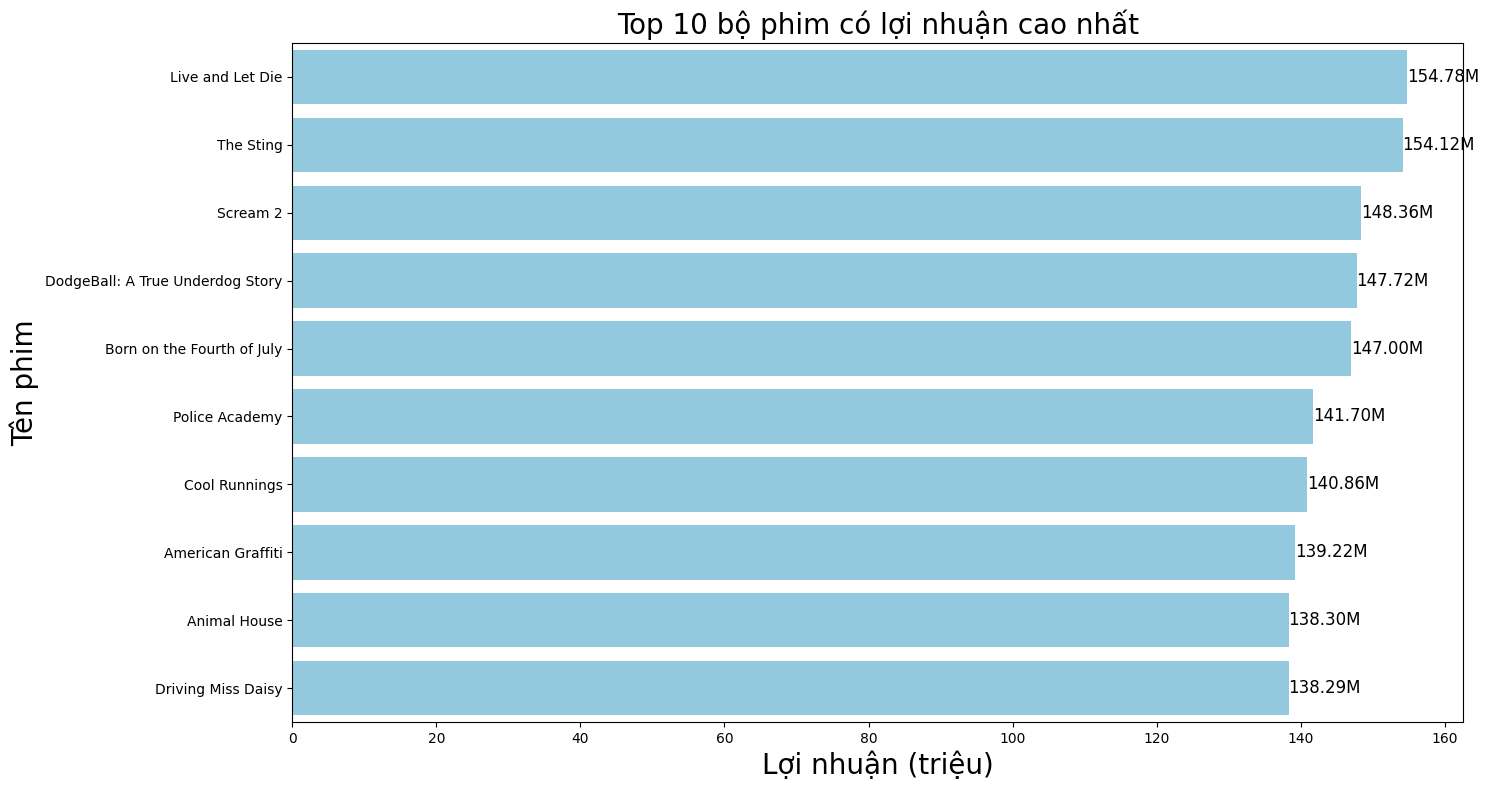

In [ ]:
# Sắp xếp các bộ phim dựa trên lợi nhuận (top 10 bộ phim)
sort_movies = movies.sort_values(by='profit', ascending=False).head(10)

sort_movies['profit_in_million'] = sort_movies['profit'] / 1e6
# Vẽ biểu đồ cho 10 bộ phim có lợi nhuận cao nhất
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x=sort_movies['profit_in_million'], y=sort_movies['original_title'], color='skyblue')  # Sử dụng màu xám
plt.title('Top 10 bộ phim có lợi nhuận cao nhất', fontsize=20)
plt.xlabel('Lợi nhuận (triệu)', fontsize=20)
plt.ylabel('Tên phim', fontsize=20)
for index, value in enumerate(sort_movies['profit_in_million']):
    bar_plot.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

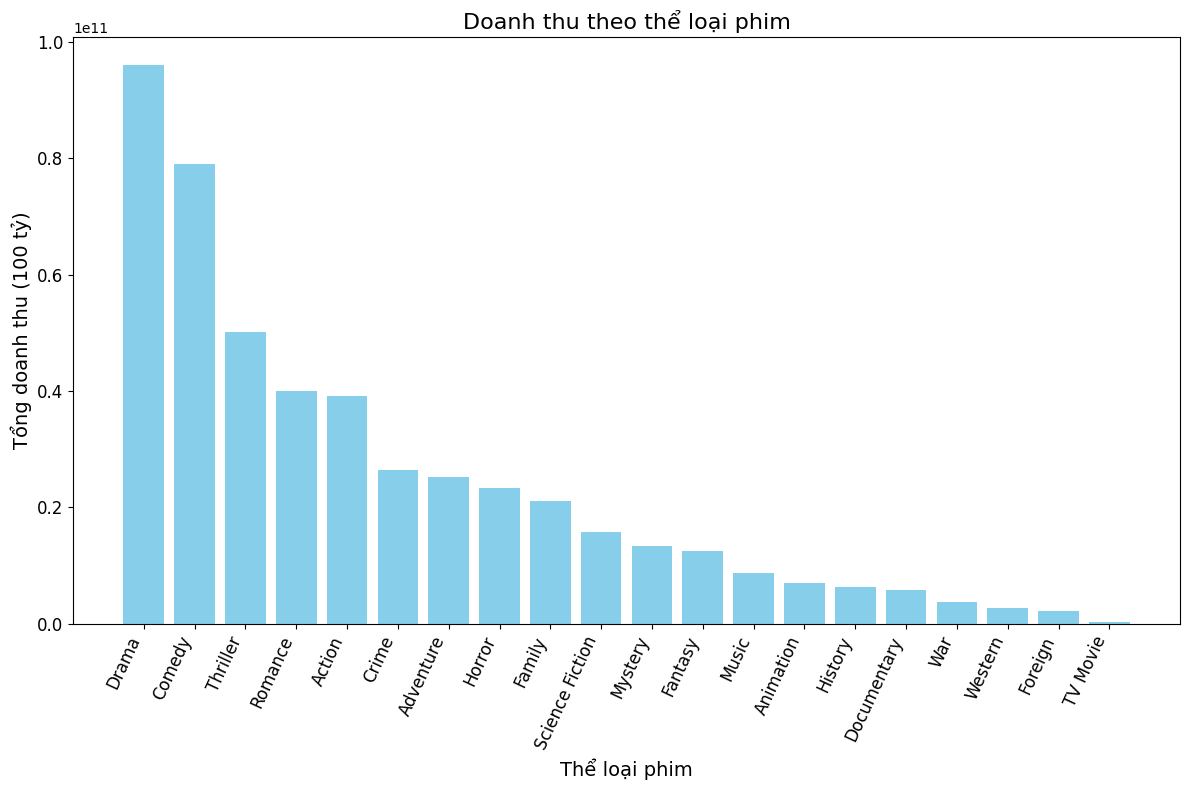

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import ast  # Để chuyển đổi chuỗi thể loại phim thành danh sách

# Tạo một từ điển để lưu tổng doanh thu cho mỗi thể loại phim
revenue_by_genre = {}

# Tính tổng doanh thu cho mỗi thể loại phim
for index, row in movies.iterrows():
    for genre in row['genres']:
        revenue_by_genre[genre] = revenue_by_genre.get(genre, 0) + row['revenue']

# Chuyển từ điển thành DataFrame
genre_revenue_df = pd.DataFrame(list(revenue_by_genre.items()), columns=['Genre', 'Total Revenue'])

# Sắp xếp theo doanh thu giảm dần
genre_revenue_df = genre_revenue_df.sort_values(by='Total Revenue', ascending=False)

#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.bar(genre_revenue_df['Genre'], genre_revenue_df['Total Revenue'], color='skyblue')
plt.xlabel('Thể loại phim', fontsize=14)
plt.ylabel('Tổng doanh thu (100 tỷ)', fontsize=14)
plt.title('Doanh thu theo thể loại phim', fontsize=16)
plt.xticks(rotation=65, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(genre_revenue_df['Total Revenue']):
    bar_plot.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

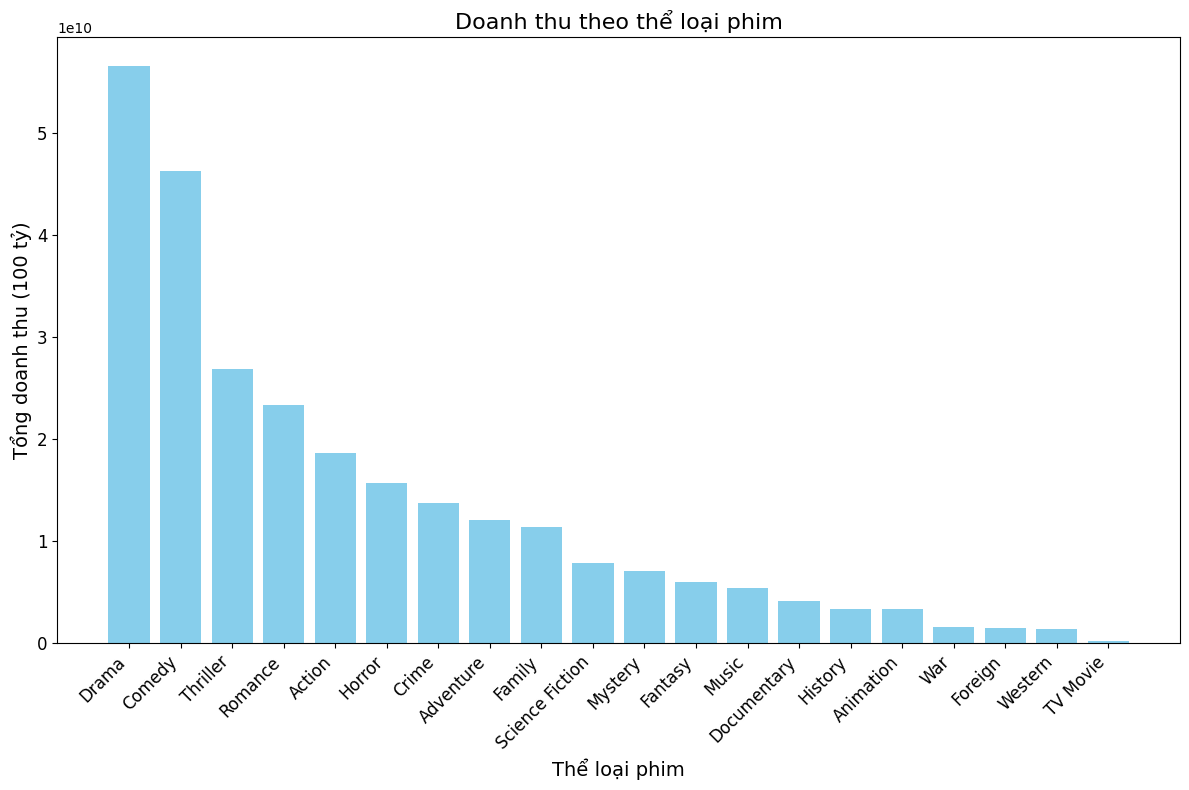

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import ast  # Để chuyển đổi chuỗi thể loại phim thành danh sách

# Tạo một từ điển để lưu tổng doanh thu cho mỗi thể loại phim
revenue_by_genre = {}

# Tính tổng doanh thu cho mỗi thể loại phim
for index, row in movies.iterrows():
    for genre in row['genres']:
        revenue_by_genre[genre] = revenue_by_genre.get(genre, 0) + row['profit']

# Chuyển từ điển thành DataFrame
genre_revenue_df = pd.DataFrame(list(revenue_by_genre.items()), columns=['Genre', 'Total Profit'])

# Sắp xếp theo doanh thu giảm dần
genre_revenue_df = genre_revenue_df.sort_values(by='Total Profit', ascending=False)

#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.bar(genre_revenue_df['Genre'], genre_revenue_df['Total Profit'], color='skyblue')
plt.xlabel('Thể loại phim', fontsize=14)
plt.ylabel('Tổng doanh thu (100 tỷ)', fontsize=14)
plt.title('Doanh thu theo thể loại phim', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(genre_revenue_df['Total Profit']):
    bar_plot.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

def draw_movie_chart(order_by):
    # Select the appropriate column for sorting
    if order_by == 'Ascending by Profit':
        sort_column = 'profit'
        title_text = "Top 10 Movies by Profit (Ascending)"
    elif order_by == 'Descending by Profit':
        sort_column = 'profit'
        title_text = "Top 10 Movies by Profit (Descending)"
    elif order_by == 'Ascending by Budget':
        sort_column = 'budget'
        title_text = "Top 10 Movies by Budget (Ascending)"
    elif order_by == 'Descending by Budget':
        sort_column = 'budget'
        title_text = "Top 10 Movies by Budget (Descending)"
    elif order_by == 'Ascending by Revenue':
        sort_column = 'revenue'
        title_text = "Top 10 Movies by Revenue (Ascending)"
    elif order_by == 'Descending by Revenue':
        sort_column = 'revenue'
        title_text = "Top 10 Movies by Revenue (Descending)"
    else:
        print("Invalid input. Please enter A, B, c, d, e, or f.")
        return

    # Sort and select the top 15 movies
    budget = movies[['title', 'budget', 'revenue', 'profit']].sort_values(by=sort_column, ascending=(order_by in ['Ascending by Profit', 'Ascending by Budget', 'Ascending by Revenue'])).reset_index().head(10)
    budget.drop(columns='index', axis=0, inplace=True)

    # Create the figure
    fig = go.Figure(
        data=[
            go.Bar(
                name="Budget",
                x=budget["title"],
                y=budget["budget"],
                offsetgroup=0,
                marker_color='salmon'
            ),
            go.Bar(
                name="Revenue",
                x=budget["title"],
                y=budget["revenue"],
                offsetgroup=1,
                marker_color='moccasin'
            ),
            go.Bar(
                name="Profit",
                x=budget["title"],
                y=budget["profit"],
                offsetgroup=2,
                marker_color='firebrick'
            )
        ],
        layout=go.Layout(
            title=title_text,
            xaxis_title="Movies",
            yaxis_title="Price"
        )
    )

    # Show the figure
    fig.show()



In [ ]:
draw_movie_chart('Descending by Profit')

NameError: ignored

In [ ]:
draw_movie_chart('Ascending by Profit')

## Phân tích theo thời gian

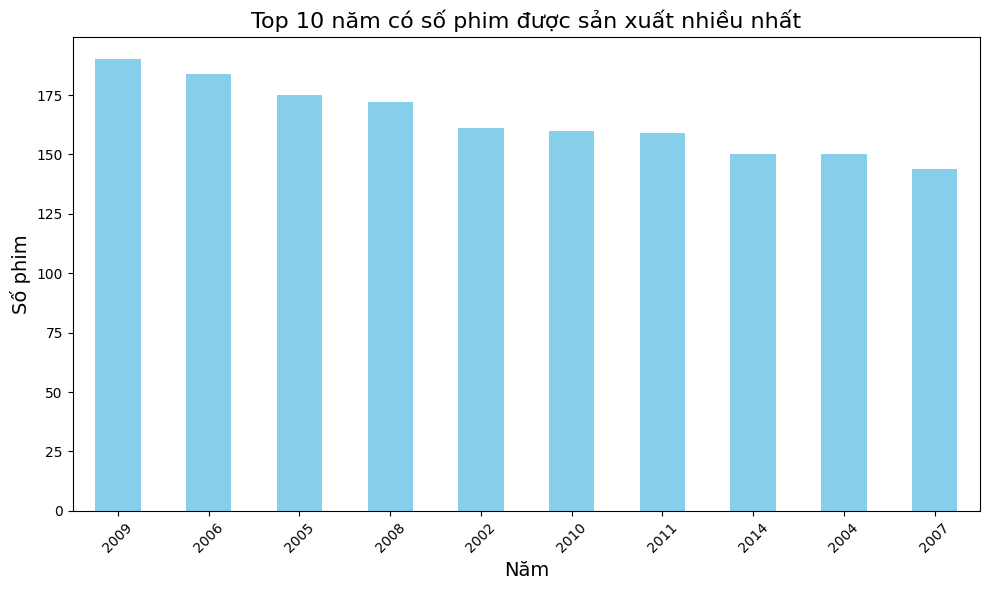

In [ ]:
# Chuyển đổi cột 'Release_Date' sang định dạng datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Tạo cột 'Release_Year' để lấy năm từ ngày tháng
movies['release_year'] = movies['release_date'].dt.year

# Đếm số lần xuất hiện theo năm
movie_count_by_year = movies['release_year'].value_counts()

# Chọn top 10 năm có số phim được sản xuất nhiều nhất
top_10_years = movie_count_by_year.nlargest(10)

# Vẽ bar chart từ cao đến thấp
plt.figure(figsize=(10, 6))
top_10_years.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 năm có số phim được sản xuất nhiều nhất', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số phim', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

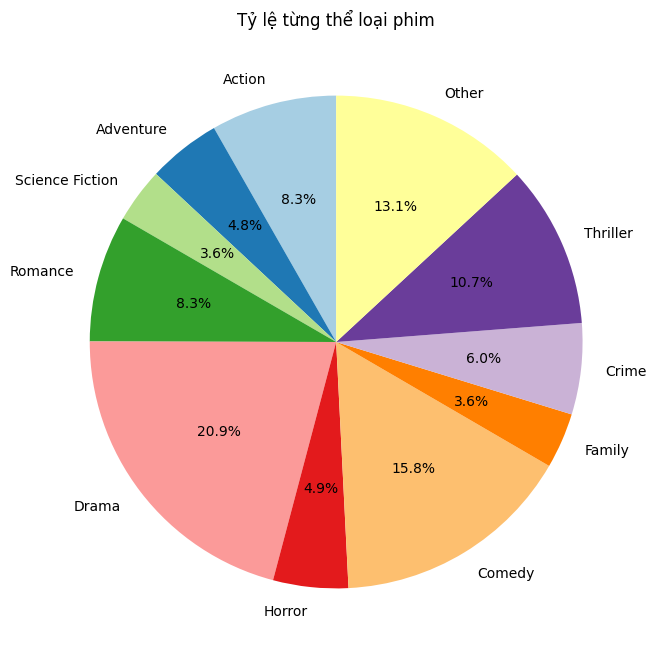

In [ ]:
# Calculate the percentage of each category
category_percentages = genres_count / genres_count.sum()

# Identify categories below 5% of the total
mask = category_percentages < 0.03
small_cat_totals = genres_count[mask]
big_cat_totals = genres_count[~mask]

# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(big_cat_totals)))
big_cat_totals.plot(kind="pie", colors=colors, autopct='%1.1f%%', label="", startangle=90)
plt.title("Tỷ lệ từng thể loại phim", fontsize=12)
plt.show()

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 83 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3490 non-null   float64       
 1   genres                3490 non-null   object        
 2   id                    3490 non-null   int64         
 3   keywords              3490 non-null   object        
 4   original_language     3490 non-null   object        
 5   original_title        3490 non-null   object        
 6   overview              3489 non-null   object        
 7   popularity            3490 non-null   float64       
 8   production_companies  3490 non-null   object        
 9   production_countries  3490 non-null   object        
 10  release_date          3490 non-null   datetime64[ns]
 11  revenue               3490 non-null   float64       
 12  runtime               3490 non-null   float64       
 13  spoken_languages 

## Time Analysis

Các phim nổi tiếng nhất từ 2010 - 2016

In [ ]:
movies['year'] =  pd.to_datetime(movies['release_date']).dt.year

In [ ]:
movies['year'].max()

2017

In [ ]:
movies.sort_values(by='popularity', ascending=False)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,title,vote_average,vote_count,cast,crew,directors,profit,release_year,year
2654,7.000000e+06,"[Thriller, Science Fiction]",262543,"[artificial intelligence, rain, future, dystop...",en,Autómata,"Jacq Vaucan, an insurance agent of ROC robotic...",49.808505,"[Green Moon Productions, Nu Boyana Viburno]",[Spain],...,[English],Automata,5.6,670,"[Antonio Banderas, Birgitte Hjort Sørensen, Dy...","[{""credit_id"": ""5450fb9f0e0a2639fe004693"", ""de...",[Gabe Ibáñez],7.529491e+07,2014,2014
4339,9.500000e+05,"[Adventure, Action, Thriller]",646,"[london england, england, assassination, spy, ...",en,Dr. No,"In the film that launched the James Bond saga,...",48.901542,"[United Artists, Eon Productions]","[Jamaica, United Kingdom]",...,"[English, Français]",Dr. No,6.9,940,"[Sean Connery, Ursula Andress, Joseph Wiseman,...","[{""credit_id"": ""52fe4263c3a36847f801aa63"", ""de...",[Terence Young],5.865000e+07,1962,1962
2056,2.200000e+07,"[Mystery, Thriller]",204922,"[amnesia, therapist, aggression, hospital, fla...",en,Before I Go to Sleep,"A woman wakes up every day, remembering nothin...",48.784734,"[StudioCanal, Scott Free Productions, Millenni...","[France, Sweden, United Kingdom]",...,[English],Before I Go to Sleep,6.2,659,"[Nicole Kidman, Colin Firth, Mark Strong, Anne...","[{""credit_id"": ""57064f9f9251411f3c0020e4"", ""de...",[Rowan Joffe],-6.552846e+06,2014,2014
1674,3.000000e+07,"[Thriller, Crime, Drama]",265208,"[gambling, bodyguard, remake]",en,Wild Card,When a Las Vegas bodyguard with lethal skills ...,48.034300,"[Current Entertainment, Lionsgate, Sierra / Af...",[United States of America],...,[English],Wild Card,5.4,656,"[Jason Statham, Michael Angarano, Milo Ventimi...","[{""credit_id"": ""567846fcc3a3684750000223"", ""de...",[Simon West],5.229491e+07,2015,2015
606,7.000000e+07,"[Crime, Drama, Mystery]",201088,"[terrorist, technology, anti hero, hacker, com...",en,Blackhat,A man is released from prison to help American...,46.832372,"[Universal Pictures, Forward Pass, Legendary P...",[United States of America],...,"[English, Italiano, 普通话, Español]",Blackhat,5.1,826,"[Chris Hemsworth, Leehom Wang, Tang Wei, Viola...","[{""credit_id"": ""5549e18ec3a36841b9001c03"", ""de...",[Michael Mann],-5.224706e+07,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2.905402e+07,"[Comedy, Music]",114065,[],en,Down & Out With The Dolls,"The raunchy, spunky tale of the rise and fall ...",0.002386,[],[],...,[],Down & Out With The Dolls,0.0,0,[],[],[],5.324089e+07,2003,2003
4509,5.500000e+05,"[Drama, Thriller]",75986,"[obsession, radio, nudity, letter, love, roman...",en,Love Letters,A story of love and obsession. A young radio p...,0.001586,"[New World Pictures, Millennium Films]",[United States of America],...,[English],Love Letters,4.6,4,"[Jamie Lee Curtis, Bonnie Bartlett, Matt Clark...","[{""credit_id"": ""52fe4921c3a368484e11b9d9"", ""de...",[Amy Holden Jones],8.174491e+07,1983,1983
4625,2.905402e+07,[Horror],426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],...,[English],Midnight Cabaret,0.0,0,"[Lisa Hart Carroll, Michael Des Barres, Paul D...","[{""credit_id"": ""582a4cdb9251417b1803dd47"", ""de...",[Pece Dingo],5.324089e+07,1990,1990
4727,2.905402e+07,"[Action, Drama]",65448,"[prison, boxing]",en,Penitentiary,A hitchhiker named Martel Gordone gets in a fi...,0.001117,[],[],...,[English],Penitentiary,4.9,8,"[Wilbur 'Hi-Fi' White, Leon Isaac Kennedy, Tho...","[{""credit_id"": ""52fe470ac3a368484e0b1e1b"", ""de...",[Jamaa Fanaka],5.324089e+07,1979,1979


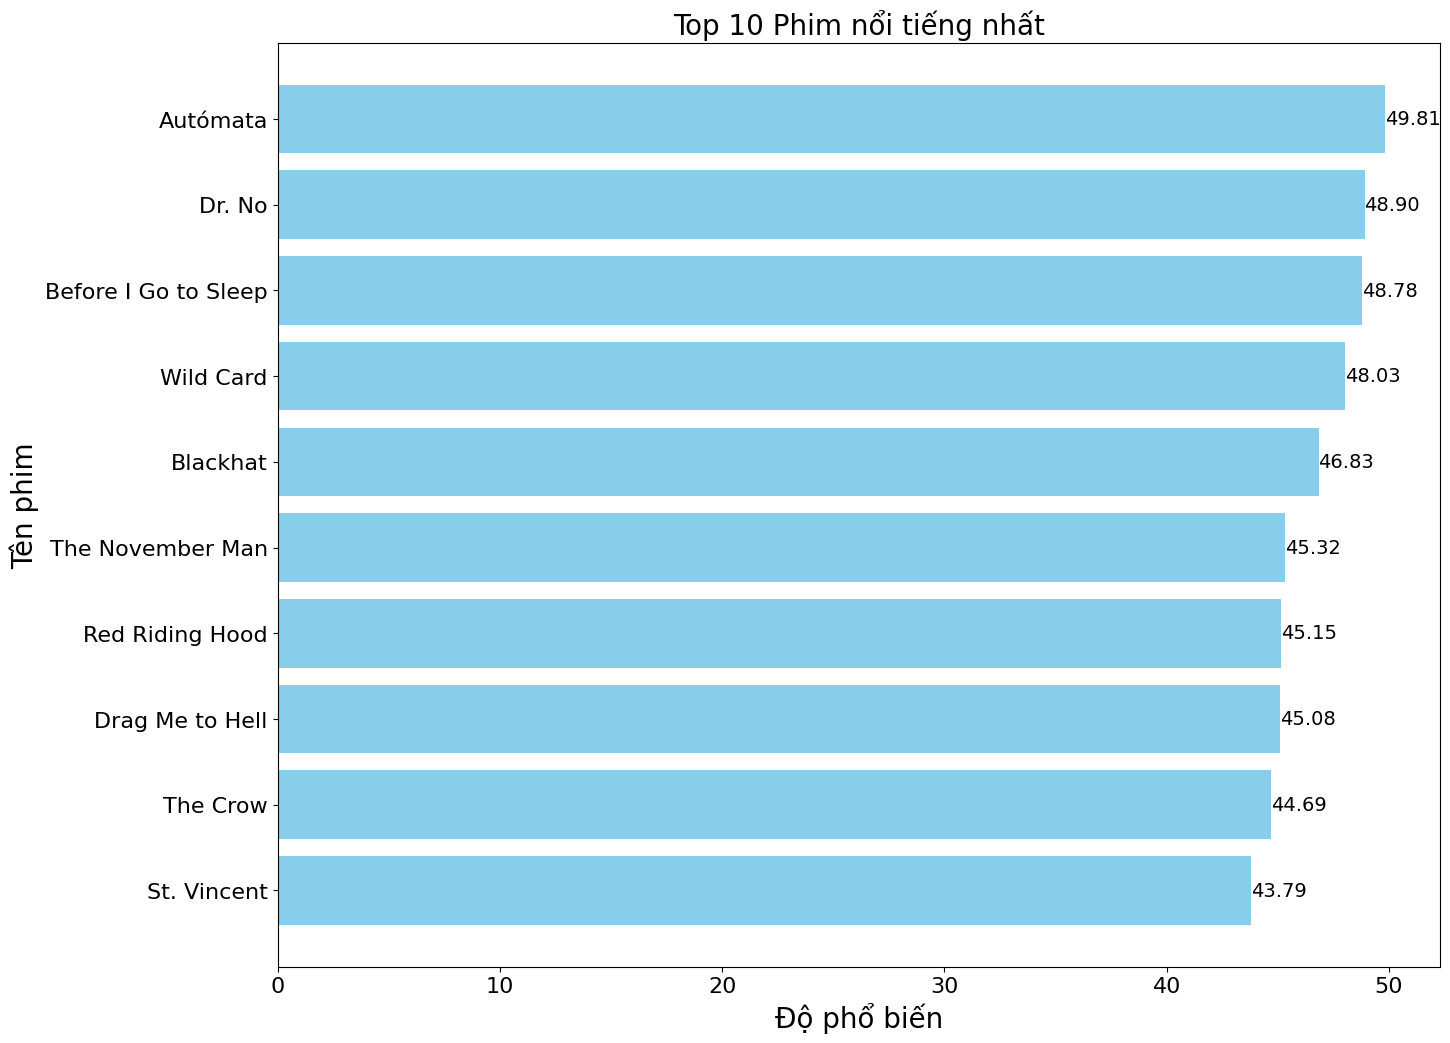

In [ ]:
def get_insights_popularity(year_1=0, year_2=0):
    # Hàm này sẽ cung cấp thông tin về độ phổ biến cao nhất
    # Tham số:
    #    df : DataFrame (dữ liệu phim)
    #    year_1 : int (năm từ 1960 đến 2016)
    #           nếu bạn không nhập bất kỳ số nào, hàm sẽ cung cấp thông tin của tất cả các năm
    #           nếu bạn nhập một năm cụ thể, hàm sẽ cung cấp thông tin của năm đó
    #    year_2 : int (năm từ year_1 đến 2016)
    #            nếu bạn nhập một năm cụ thể, hàm sẽ cung cấp thông tin từ year_1 đến year_2

    sorted_popularity = movies.sort_values(by='popularity', ascending=False)

    if year_2 == 0:
        year_2 = year_1

    if year_1 != 0:
        sorted_popularity = sorted_popularity.query('year >= @year_1 and year <= @year_2')

    plt.subplots(figsize=(15, 12))
    plt.gca().invert_yaxis()
    bar_plot = plt.barh(sorted_popularity['original_title'].head(10), sorted_popularity['popularity'].head(10), color='skyblue')  # Sử dụng màu skyblue
    plt.xlabel('Độ phổ biến', fontsize=20)
    plt.ylabel('Tên phim', fontsize=20)
    plt.title('Top 10 Phim nổi tiếng nhất',fontsize=20)

    # Thêm label cho từng cột
    for idx, value in enumerate(sorted_popularity['popularity'].head(10)):
        plt.text(value, idx, f'{value:.2f}', ha='left', va='center', fontsize=14, color='black')

    plt.tick_params(axis='both', labelsize=16)  # Tăng kích cỡ font cho cả hai trục

    plt.show()

# Ví dụ sử dụng:
# Tạo một cột riêng cho thông tin 'năm'
movies['year'] = pd.to_datetime(movies['release_date']).dt.year

# Gọi hàm với DataFrame và khoảng năm mong muốn.
get_insights_popularity(year_1=1929, year_2=2017)

**Doanh thu qua thời gian - revenue & released date**

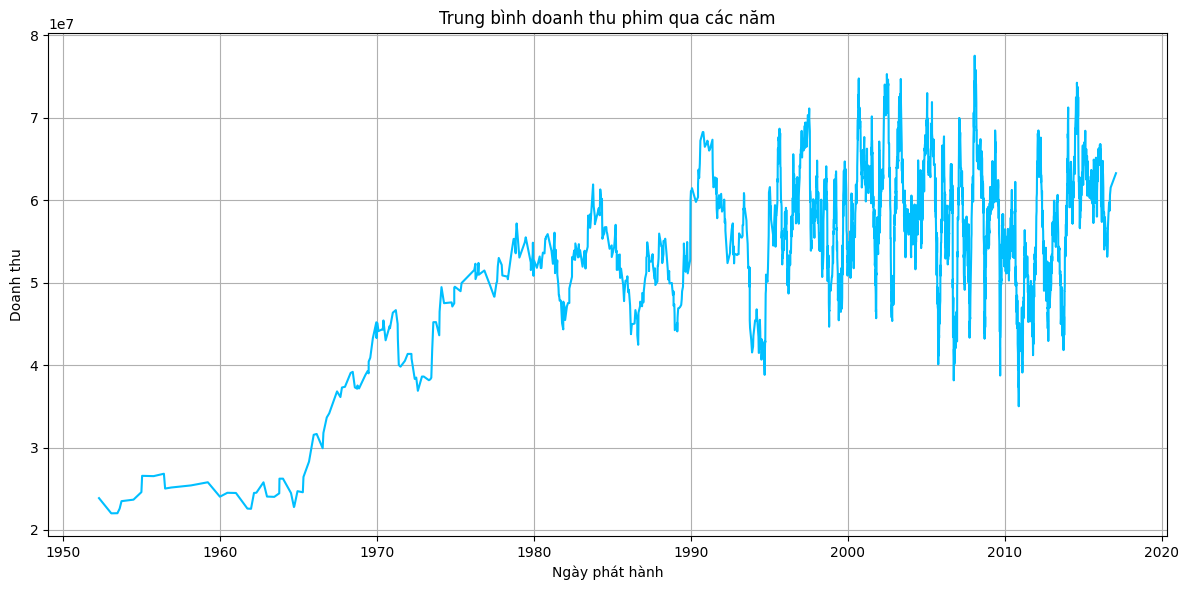

In [ ]:
# Chuyển cột 'release_date' sang dạng datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Sắp xếp theo 'release_date'
movies = movies.sort_values(by='release_date')

# Dùng trung bình động
window_size = 40
movies['revenue_ma'] = movies['revenue'].rolling(window=window_size).mean()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(movies['release_date'], movies['revenue_ma'], linestyle='-', color='deepskyblue')
plt.title('Trung bình doanh thu phim qua các năm')
plt.xlabel('Ngày phát hành')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.tight_layout()

##Phân tích theo đạo diễn, nhà sản xuất, nước phát hành

In [ ]:
# Assuming 'directors' column contains lists, and  flatten them
movies['directors'] = movies['directors'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Drop rows with None values in the 'directors' column
movies = movies.dropna(subset=['directors'])

# Grouping by the Director and calculating the average review and count of movies

director_rating = movies.groupby('directors').agg({'vote_average': 'mean', 'id': 'count'}).rename(columns={'id': 'movie_count'})
#agg() function used for the applying multiple aggregation and rename to make the data more understanding

# Removing the directors with less than 7 movies
directorLimit = director_rating[director_rating['movie_count'] > 7]

# Sort directors by average rating in descending order to get the top rated directors accordingly

top_director = directorLimit.sort_values(by='vote_average', ascending=False).head(15)

top_director[['vote_average']]

,vote_average
directors,
Martin Scorsese,7.137500
Richard Linklater,6.922222
Stephen Frears,6.620000
Woody Allen,6.512500
Oliver Stone,6.455556
Clint Eastwood,6.450000
Richard Donner,6.425000
Spike Lee,6.346154
Joel Schumacher,6.337500


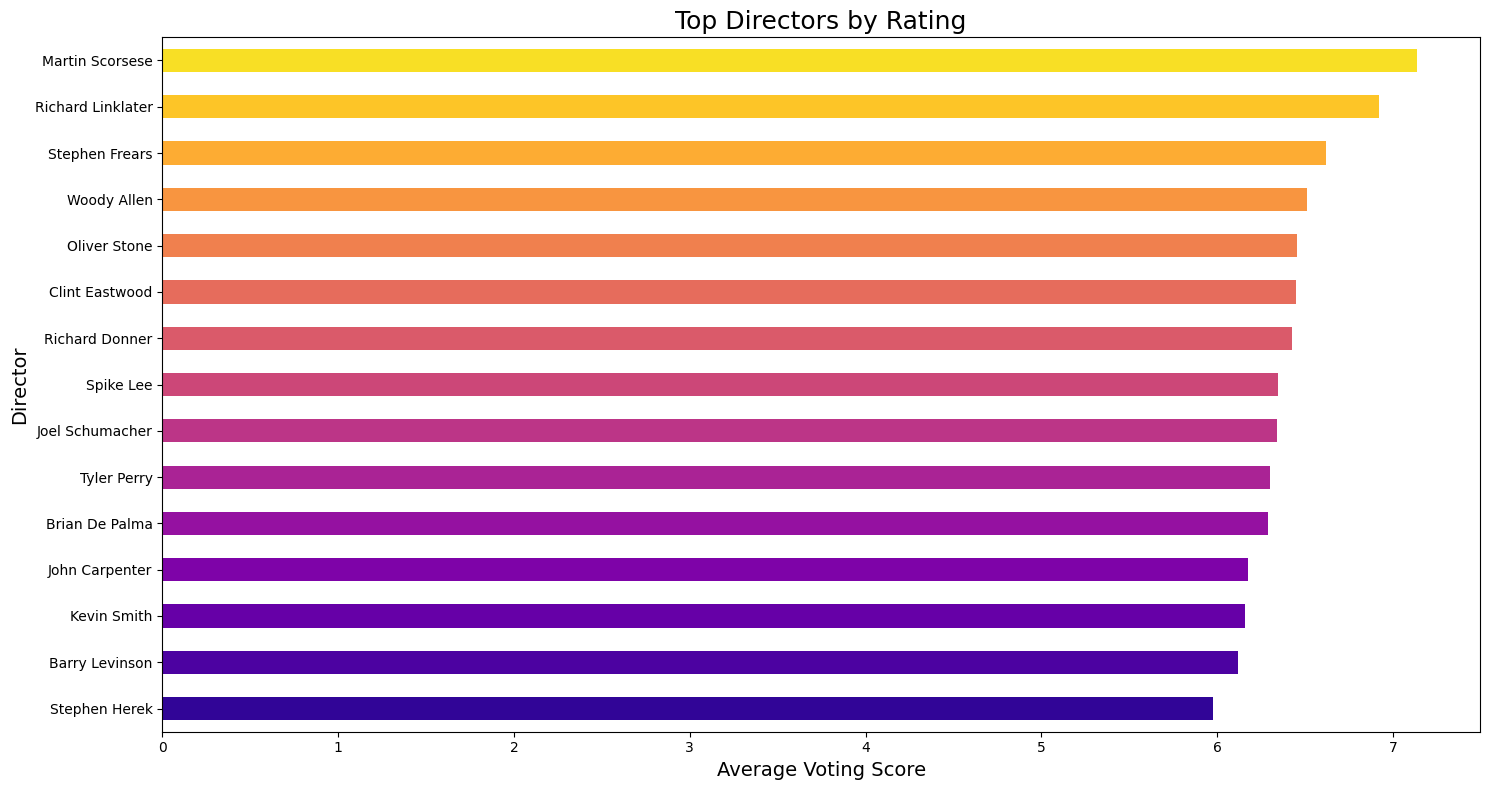

In [ ]:
# Excluding the 'unknown' values from the column
top_director = top_director[top_director.index != 'unknown']

# Getting the top 15 Directors
top_director_new = top_director.head(15)
# Plotting the average voting scores for the top directors
plt.figure(figsize=(15, 8))
top_director['vote_average'].sort_values().plot(kind='barh', color=sns.color_palette("plasma", len(top_director)))
plt.title('Top Directors by Rating', fontsize=18)
plt.xlabel('Average Voting Score', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

In [ ]:
director_genre = movies[['genres','directors','cast']]
director_genre

,genres,directors,cast
4457,"[Drama, Thriller, Romance]",G.W. Pabst,"[Louise Brooks, Fritz Kortner, Francis Lederer..."
4594,"[Drama, Music, Romance]",Harry Beaumont,"[Charles King, Anita Page, Bessie Love, Nacio ..."
3804,"[Action, Drama, History]",James Whale,"[Ben Lyon, James Hall, Jean Harlow, John Darro..."
3611,"[Drama, Romance, War]",Frank Borzage,"[Helen Hayes, Gary Cooper, Adolphe Menjou, Mar..."
4570,"[Music, Comedy, Romance]",Lloyd Bacon,"[Warner Baxter, Bebe Daniels, George Brent, Ru..."
...,...,...,...
4720,[Drama],Nate Parker,"[Nate Parker, Armie Hammer, Aja Naomi King, Ja..."
3249,[Adventure],Justin Tipping,"[Mahershala Ali, Kofi Siriboe, Christopher Mey..."
3302,[Drama],Bruce Beresford,"[Eddie Murphy, Britt Robertson, Natascha McElh..."
3408,"[Drama, Romance]",Kim Nguyen,"[Dane DeHaan, Tatiana Maslany, Gordon Pinsent,..."


In [ ]:
# Convert the 'genres' and 'cast' column from lists to strings
director_genre['genres'] = director_genre['genres'].apply(lambda x: ', '.join(map(str, x)))
director_genre['cast'] = director_genre['cast'].apply(lambda x: ', '.join(map(str, x)))

# Display the updated DataFrame
print(director_genre)

                        genres        directors  \
4457  Drama, Thriller, Romance       G.W. Pabst   
4594     Drama, Music, Romance   Harry Beaumont   
3804    Action, Drama, History      James Whale   
3611       Drama, Romance, War    Frank Borzage   
4570    Music, Comedy, Romance      Lloyd Bacon   
...                        ...              ...   
4720                     Drama      Nate Parker   
3249                 Adventure   Justin Tipping   
3302                     Drama  Bruce Beresford   
3408            Drama, Romance       Kim Nguyen   
4255     Comedy, Family, Drama     Frank Lotito   

                                                   cast  
4457  Louise Brooks, Fritz Kortner, Francis Lederer,...  
4594  Charles King, Anita Page, Bessie Love, Nacio H...  
3804  Ben Lyon, James Hall, Jean Harlow, John Darrow...  
3611  Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...  
4570  Warner Baxter, Bebe Daniels, George Brent, Rub...  
...                                    

In [ ]:
gen_dummies = director_genre.genres.str.get_dummies(sep=', ') #Creating dummy variables for genres from director_genre
digenre_dummies = director_genre.join(gen_dummies) #Joining director_genre with genre_dummies
digenre_dummies.head(3)

,genres,directors,cast,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4457,"Drama, Thriller, Romance",G.W. Pabst,"Louise Brooks, Fritz Kortner, Francis Lederer,...",0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4594,"Drama, Music, Romance",Harry Beaumont,"Charles King, Anita Page, Bessie Love, Nacio H...",0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3804,"Action, Drama, History",James Whale,"Ben Lyon, James Hall, Jean Harlow, John Darrow...",1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Các đạo diễn có điểm số rating cao nhất thường chọn sản xuất thể loại nào
most_rating_director= top_director.index.tolist()
most_rating_director


director_genre_totals = digenre_dummies.groupby('directors').sum() #summing the genres for each director with groupby
cond = director_genre_totals.index.isin(most_rating_director) #checking if famous director are in director_genre_totals
gen_of_each_director = director_genre_totals[cond] #filter for famous directors

gen_of_each_director.head(10)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,
Barry Levinson,2,1,0,8,3,0,6,1,0,0,0,0,0,1,2,1,0,2,1,0
Brian De Palma,0,0,0,0,4,0,4,0,0,0,0,3,0,4,1,0,0,5,1,0
Clint Eastwood,3,3,0,0,3,0,6,0,1,0,1,0,1,1,1,1,0,4,1,2
Joel Schumacher,1,1,0,3,3,0,5,0,0,0,0,2,0,2,1,1,0,6,0,0
John Carpenter,6,2,0,2,0,0,1,0,3,0,0,4,0,0,0,5,0,3,0,0
Kevin Smith,2,1,0,11,1,0,1,0,2,0,0,3,0,0,3,0,0,2,0,0
Martin Scorsese,0,0,0,0,1,2,6,0,0,0,0,0,2,0,1,0,0,0,0,0
Oliver Stone,0,0,0,0,3,0,9,0,0,0,2,0,1,0,0,0,0,2,1,0
Richard Donner,4,4,0,1,2,0,4,0,2,0,0,1,0,1,1,1,0,4,0,0


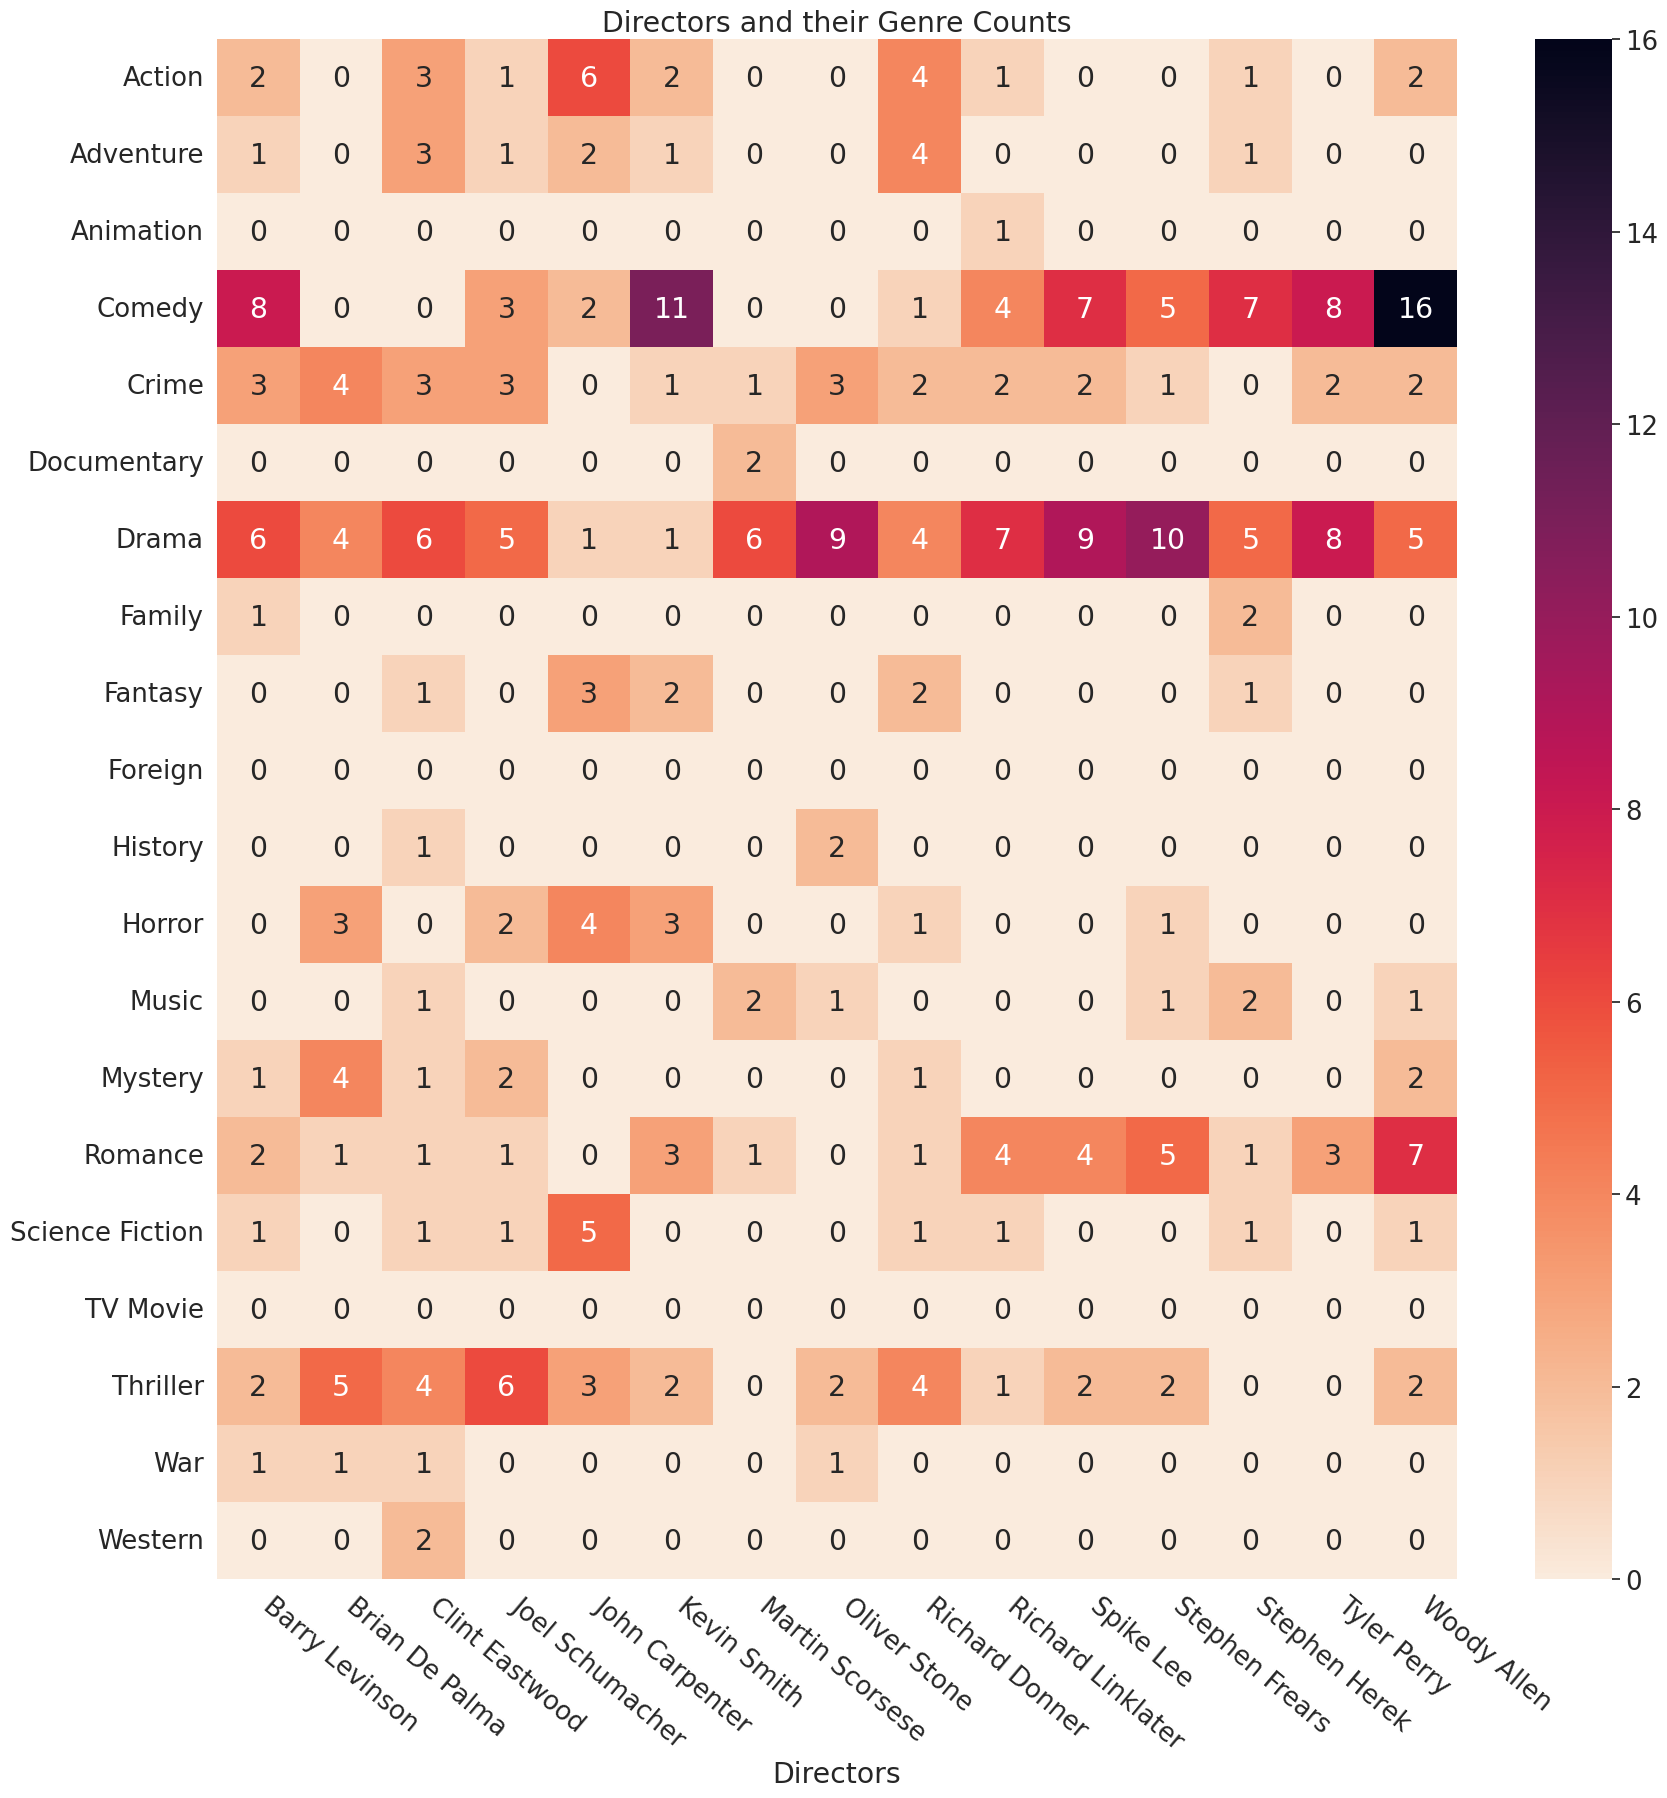

In [ ]:
#vẽ heatmap cho thể hiện số lượng từng thể loại phim của từng đạo diễn có rating cao nhất
plt.figure(figsize=(20,20))
sns.set(font_scale=1.7)
sns.heatmap(gen_of_each_director.T, cmap='rocket_r', annot=True)

plt.title('Directors and their Genre Counts')
plt.xlabel('Directors')
plt.xticks(rotation=-40, ha='left');

# **4. Mô hình - Nam**

In [ ]:
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,directors
83,2.700000e+07,"[Action, Adventure, Science Fiction, Romance]",79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[Corsan, Bliss Media, Limelight International ...","[Australia, Belgium, India]",2015-02-13,8.229491e+07,109.0,[English],The Lovers,4.8,34,"[Josh Hartnett, Simone Kessell, Tamsin Egerton...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",[Roland Joffé]
97,1.500000e+07,"[Action, Adventure, Drama, Horror, Science Fic...",315011,"[monster, godzilla, giant monster, destruction...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[Cine Bazar, Toho Pictures]",[Japan],2016-07-29,7.700000e+07,120.0,"[Italiano, Deutsch, English, 日本語]",Shin Godzilla,6.5,143,"[Hiroki Hasegawa, Yutaka Takenouchi, Satomi Is...","[{""credit_id"": ""5921d321c3a368799b05933f"", ""de...","[Hideaki Anno, Shinji Higuchi]"
265,2.905402e+07,"[Comedy, Fantasy, Family]",10588,"[cat, brother sister relationship, boredom, ch...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[Imagine Entertainment, DreamWorks SKG, Univer...",[United States of America],2003-11-21,8.229491e+07,82.0,[English],The Cat in the Hat,4.9,366,"[Mike Myers, Dakota Fanning, Spencer Breslin, ...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de...",[Bo Welch]
302,8.000000e+07,"[Animation, Adventure, Family, Fantasy]",41216,[owl],en,Legend of the Guardians: The Owls of Ga'Hoole,"Soren, a young barn owl, is kidnapped by owls ...",37.321848,"[Village Roadshow Pictures, Warner Bros., Anim...","[Australia, United States of America]",2010-07-10,1.400734e+08,97.0,[English],Legend of the Guardians: The Owls of Ga'Hoole,6.5,703,"[Emily Barclay, Abbie Cornish, Essie Davis, Jo...","[{""credit_id"": ""52fe45bcc3a36847f80d7a33"", ""de...",[Zack Snyder]
314,1.000000e+07,"[Crime, Drama, Mystery, Thriller]",29193,"[dialogue, confidence, invention, independent ...",en,The Spanish Prisoner,An employee of a corporation with a lucrative ...,3.091077,"[Jean Doumanian Productions, Sweetland Films, ...",[United States of America],1997-09-08,1.383513e+07,110.0,[English],The Spanish Prisoner,7.1,73,"[Steve Martin, Campbell Scott, Ben Gazzara, Re...","[{""credit_id"": ""561f77189251417f47001122"", ""de...",[David Mamet]


Về cơ bản có hai loại hệ thống gợi ý:

- Demographic Filtering: Đưa ra các đề xuất tổng quát cho mọi người dùng, dựa trên mức độ phổ biến của phim và/hoặc thể loại. Hệ thống đề xuất những bộ phim giống nhau cho người dùng có đặc điểm nhân khẩu học tương tự. Vì mỗi người dùng là khác nhau nên cách tiếp cận này được coi là quá đơn giản. Ý tưởng cơ bản đằng sau hệ thống này là những bộ phim nổi tiếng và được giới phê bình đánh giá cao hơn sẽ có xác suất được khán giả bình thường yêu thích cao hơn.
- Content-Based Filtering: Đề xuất các bộ phim tương tự dựa trên một bộ phim cụ thể. Hệ thống này sử dụng siêu dữ liệu mục, chẳng hạn như thể loại, đạo diễn, mô tả, diễn viên, v.v. cho phim, để đưa ra những đề xuất này. Ý tưởng chung đằng sau những hệ thống gợi ý này là nếu một người thích một bộ phim cụ thể thì người đó cũng sẽ thích một bộ phim tương tự với nó.
- Collaborative Filtering: Hệ thống này kết nối những người có cùng sở thích và đưa ra đề xuất dựa trên sự kết hợp này. Collaborative Filtering không yêu cầu siêu dữ liệu mục giống như hệt thống Content-Based Filtering.


## **Demographic Filtering**


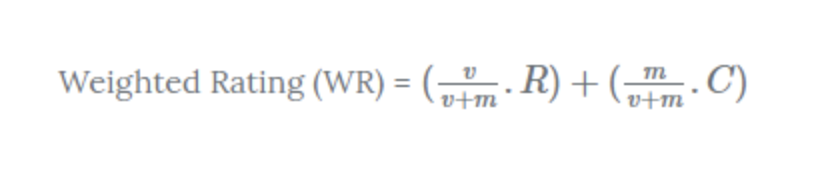

Công thức Weighted Rating (xếp hạng có trọng số) được sử dụng để tính điểm trung bình của các phần tử có xếp hạng khác nhau, mỗi phần tử được nhân với một trọng số tương ứng. Công thức này giúp đánh giá các phần tử có trọng số cao hơn, làm tăng sự ảnh hưởng của chúng đối với điểm trung bình.

R là xếp hạng trung bình của phần tử (ví dụ: xếp hạng của một bộ phim).

v là số lượt xếp hạng (đánh giá) của phần tử.

C là trung bình xếp hạng của tất cả các phần tử.

m là số lượng tối thiểu xếp hạng cần để được tính toán (ngăn chặn để tránh xếp hạng có quá ít đánh giá).

In [ ]:
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.9)
q_movies = movies.copy().loc[movies['vote_count'] >= m]
def weighted_rating(x, m, C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
q_movies['score'] = q_movies.apply(lambda x: weighted_rating(x,m,C), axis=1)
q_movies = q_movies.sort_values(by='score', ascending=False)

In [ ]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
4238,Modern Times,856,8.1,7.208542
4081,The Lives of Others,958,7.9,7.143680
3870,The Hunt,927,7.9,7.128267
3984,Some Like It Hot,808,8.0,7.120395
4017,Before Sunrise,959,7.7,7.020672
4076,To Kill a Mockingbird,657,8.0,7.014232
2344,Raging Bull,938,7.7,7.011361
3570,The Elephant Man,719,7.9,7.006021
3296,Akira,773,7.8,6.984790
3987,Young Frankenstein,854,7.7,6.971415


## **Content-Based Filtering**

### Content-based KMeans

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import euclidean_distances

# Tạo DataFrame mới từ df gốc movies
movies_genres = movies[['title', 'genres', 'popularity']].copy()



mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies_genres['genres']), columns=mlb.classes_, index=movies_genres.index)
movies_genres = pd.concat([movies_genres, genres_encoded], axis=1)

pca = PCA(n_components=2)
genres_2d = pca.fit_transform(movies_genres.iloc[:, 3:])
genres_2d = pd.DataFrame(genres_2d).rename(columns={0:'pca1', 1:'pca2'})



In [ ]:
 kmeans = KMeans(n_clusters=11, random_state=42)
movies_genres['cluster'] = kmeans.fit_predict(genres_2d)

In [ ]:
# Visualization of clusters (scatter plot)
plt.scatter(genres_2d['pca1'], genres_2d['pca2'], c=movies_genres['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Movies')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:

def genre_recommender(movie_name):
    movie_row = movies_genres[movies_genres['title'] == movie_name].index
    if not movie_row.empty:
        movie_cluster = movies_genres.loc[movie_row, 'cluster'].values[0]
        cluster_movies = movies_genres[movies_genres['cluster'] == movie_cluster][['title','genres']]
        index_movie_name = cluster_movies.loc[cluster_movies.title == movie_name].index[0]
        cluster_movies.drop(index_movie_name)
        return cluster_movies
    else:
        return "Không tìm thấy phim."

In [ ]:
movie_name = 'The Visitors II: The Corridors of Time'
genre_recommender(movie_name).head(10)

### Content-based Similarity Cosin

Công thức tương quan sử dụng cosine (Cosine Similarity) là một phương pháp để đo lường sự tương quan giữa hai vectơ trong không gian đa chiều

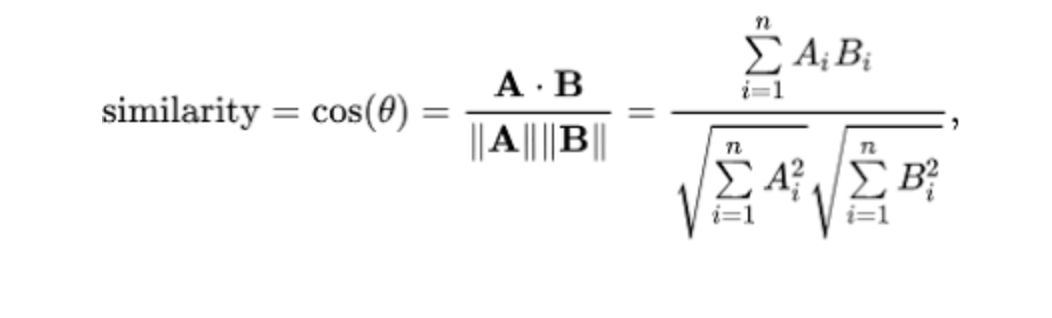

In [ ]:
def get_director(director):
  if len(director) > 0:
    return director[0]
  return "Unknown"
def get_list(names):
  if len(names) > 3:
      names = names[:3]
  return names

movies['director'] = movies['directors'].apply(get_director)

features = ['cast', 'keywords', 'genres', 'production_companies']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)
movies['overview'] = movies['overview'].apply(lambda x: str(x).split())

In [ ]:
movies[['title', 'cast', 'director', 'keywords', 'genres', 'production_companies', 'overview']].head(3)

In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
features = ['cast', 'keywords', 'director', 'genres', 'production_companies', 'overview']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [ ]:
movies[['title', 'cast', 'director', 'keywords', 'genres', 'production_companies', 'overview']].head(3)

In [ ]:
def create_soup(x):
    return ' '.join(x['overview']) + ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' \
                                   + (x['director'] + ' ')*3 + ' ' + ' '.join(x['genres']) + ' '.join(x['production_companies'])
movies['soup'] = movies.apply(create_soup, axis=1)

In [ ]:
movies['soup'].iloc[0]

In [ ]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def stem(x):
  stemmed_words = [porter.stem(word) for word in x.split()]
  return ' '.join(stemmed_words)

movies['soup'] = movies['soup'].apply(stem)

In [ ]:
movies['soup'].iloc[0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
count_matrix.shape

In [ ]:
count_matrix

In [ ]:
cosine_sim.shape

In [ ]:
cosine_sim

In [ ]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])
def get_recommendations(title, cosine_sim=cosine_sim):
    if title in indices.index:
      idx = indices[title]
      sim_scores = list(enumerate(cosine_sim[idx]))


      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

      sim_scores = sim_scores[1:11]

      movie_indices = [i[0] for i in sim_scores]
      list_similar_movies = movies['title'].iloc[movie_indices]
      print(f"DƯỚI ĐÂY LÀ MỘT SỐ BỘ PHIM CÓ LIÊN QUAN VỚI PHIM '{title}'")
      print("-"*100)
      for i in list_similar_movies:
        print("|",i," "*(100-len(i) - 5),"|")
      print("-"*100)
      return
    print(f"Không tìm thấy bộ phim '{title}'")

In [ ]:
get_recommendations("The Visitors II: The Corridors of Time")

In [ ]:
get_recommendations("Hackers")

In [ ]:
get_recommendations("Three Kingdoms: Resurrection of the Dragon")

In [ ]:
get_recommendations("Mean Girls")

## **Collaborative - Single Value Decomposition**

Phần này sử dụng các phương pháp Collaborative Filtering (Model-Based)

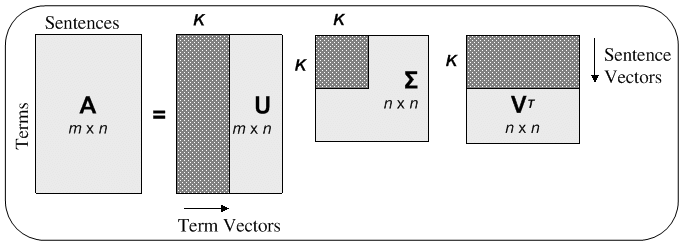

In [ ]:
pip install surprise

In [ ]:
# Bỏ cột không sử dụng: thời điểm đánh giá bộ phim
ratings = ratings.drop(columns='timestamp')

In [ ]:
ratings

In [ ]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Chia thành tập huấn luyện và tập kiểm tra
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


#### Xây dựng mô hình

In [ ]:
# Sử dụng SVD
svd_model = SVD()

# Đào tạo mô hình trên tập huấn luyện
svd_model.fit(trainset)

# Dự đoán trên tập kiểm tra
predictions = svd_model.test(testset)

#### Sử dụng mô hình

In [ ]:
# Lấy kết quả dự đoán
prediction = svd_model.predict(1, 302)

# Hiển thị kết quả
print(f'Người xem {prediction.uid}, Phim {prediction.iid} - Đánh giá dự đoán: {prediction.est:.2f} - Đánh giá thật: {prediction.uid:.2f}')

# Giải thích kết quả
if prediction.details['was_impossible']:
    print('Dự đoán cho cặp Người xem - Phim không khả thi.')
else:
    print('Dự đoán cho cặp Người xem - Phim khả thi.')

In [ ]:
# Lấy kết quả dự đoán
prediction = svd_model.predict(5, 34)

# Hiển thị kết quả
print(f'Người xem {prediction.uid}, Phim {prediction.iid} - Đánh giá dự đoán: {prediction.est:.2f} - Đánh giá thật: {prediction.uid:.2f}')

# Giải thích kết quả
if prediction.details['was_impossible']:
    print('Dự đoán cho cặp Người xem - Phim không khả thi.')
else:
    print('Dự đoán cho cặp Người xem - Phim khả thi.')

#### Đánh giá mô hình

In [ ]:
import numpy as np
import pandas as pd
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp, NMF
from surprise import Reader, Dataset

# Load DataFrame của bạn
# Giả sử DataFrame của bạn tên là 'ratings'
# Điều chỉnh đường dẫn nếu cần thiết
# ratings = pd.read_csv('đường/dẫn/tới/dữ/liệu.csv')

# Tạo một Reader và Dataset cho Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Chọn số latent factors (n_factors) là 5
n_factors = 5

# Chọn các mô hình cần thử nghiệm
models = [SVD(n_factors=n_factors), SVDpp(n_factors=n_factors), NMF(n_factors=n_factors)]

# Tạo một dictionary để lưu kết quả
results_dict = {'Model': [], 'Fold': [], 'RMSE': [], 'MAE': []}

# Thực hiện cross-validation cho mỗi mô hình
for model in models:
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

    # Trích xuất và thêm kết quả vào dictionary
    for i in range(5):
        results_dict['Model'].append(model.__class__.__name__)
        results_dict['Fold'].append(i + 1)
        results_dict['RMSE'].append(results['test_rmse'][i])
        results_dict['MAE'].append(results['test_mae'][i])

    # In ra giá trị trung bình và độ lệch chuẩn
    print(f"\nKết quả cho mô hình {model.__class__.__name__}:")
    print("Fold\tRMSE\tMAE")
    for i in range(5):
        print(f"{i + 1}\t{results['test_rmse'][i]:.4f}\t{results['test_mae'][i]:.4f}")
    print(f"\nTrung bình\t{np.mean(results['test_rmse']):.4f}\t{np.mean(results['test_mae']):.4f}")
    print(f"Độ lệch chuẩn\t{np.std(results['test_rmse']):.4f}\t{np.std(results['test_mae']):.4f}\n")

results_df = pd.DataFrame(results_dict)


In [ ]:
import pandas as pd

# Assuming you already have the 'results_df' DataFrame

# Create a DataFrame for RMSE
df_rmse = results_df[['Model', 'Fold', 'RMSE']]

# Create a DataFrame for MAE
df_mae = results_df[['Model', 'Fold', 'MAE']]

# Pivot the DataFrames
df_rmse_pivot = df_rmse.pivot(index='Model', columns='Fold', values='RMSE').reset_index()
df_mae_pivot = df_mae.pivot(index='Model', columns='Fold', values='MAE').reset_index()


In [ ]:
df_rmse_pivot

In [ ]:
df_mae_pivot

#### Điều chỉnh siêu tham số

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Reader, Dataset

# Load DataFrame của bạn
# Giả sử DataFrame của bạn tên là 'ratings'
# Điều chỉnh đường dẫn nếu cần thiết
# ratings = pd.read_csv('đường/dẫn/tới/dữ/liệu.csv')

# Tạo một Reader và Dataset cho Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Số lượng epochs từ 0 đến 100
epochs_range = range(0, 101)

# List để lưu giữ kết quả RMSE cho mỗi số lượng epochs
rmse_results = []

# Thực hiện cross-validation cho mỗi số lượng epochs
for n_epochs in epochs_range:
    # Khởi tạo mô hình SVD với số lượng epochs cụ thể
    model = SVD(n_epochs=n_epochs)

    # Thực hiện cross-validate và lấy giá trị RMSE
    results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_mean = np.mean(results['test_rmse'])
    rmse_results.append(rmse_mean)

# Vẽ đồ thị đường
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, rmse_results, label='SVD')
plt.title('RMSE vs Number of Epochs for SVD Model')
plt.xlabel('Number of Epochs')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


# 5. LỢi

In [ ]:
df_merged = movies.copy()

## Khai thác dữ liệu

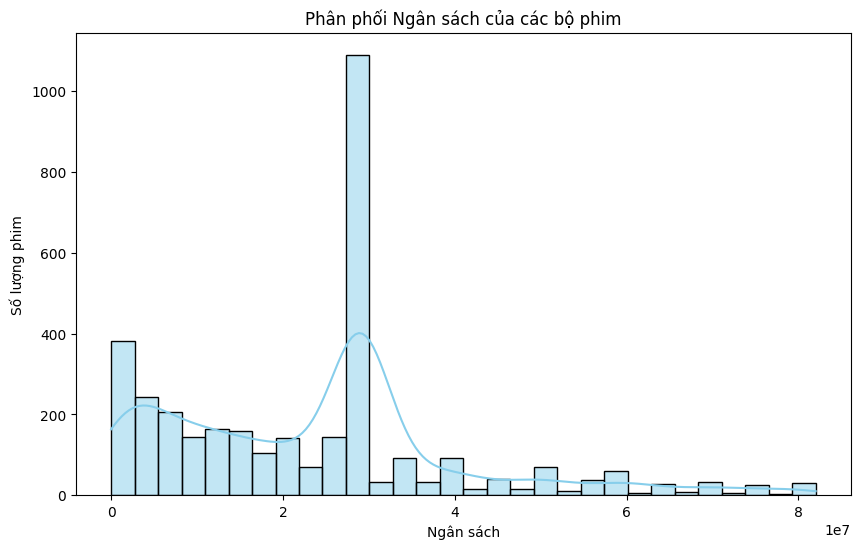

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân phối ngân sách
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['budget'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối Ngân sách của các bộ phim')
plt.xlabel('Ngân sách')
plt.ylabel('Số lượng phim')
plt.show()


Phương pháp Elbow để xác định số lượng cụm được hình thành:


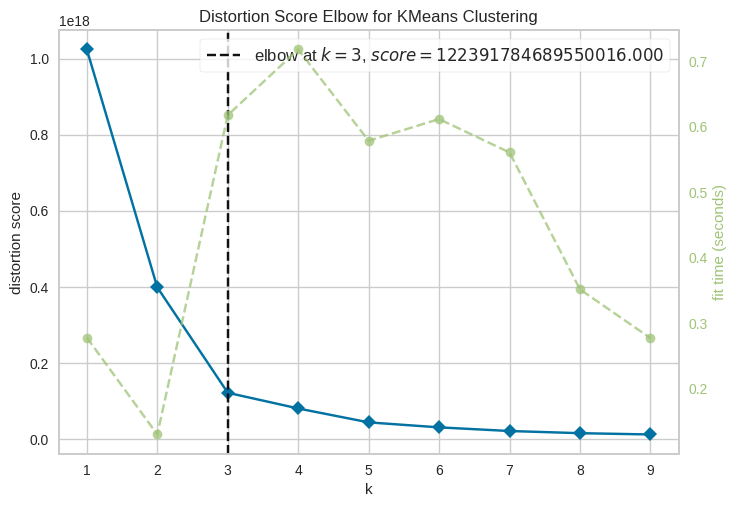

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Assume df is your DataFrame

# Select relevant features for clustering
selected_features = df_merged[['budget', 'popularity', 'vote_average', 'vote_count']]

# Determine the optimal number of clusters (k) using the Elbow Method
print('Phương pháp Elbow để xác định số lượng cụm được hình thành:')
elbow_visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
elbow_visualizer.fit(selected_features)
elbow_visualizer.show()

In [ ]:
# Choose the optimal k based on the Elbow Method
optimal_k = 3

# Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_merged['cluster'] = kmeans.fit_predict(selected_features)

# Calculate the number of elements in each cluster
print('Số phần tử của mỗi cluster:')
print(df_merged['cluster'].value_counts(), '\n')

# Calculate the coordinates of k centroids
print(f'Tọa độ của {optimal_k} trọng tâm:')
centroids = kmeans.cluster_centers_
print(centroids)

Số phần tử của mỗi cluster:
0    1781
1    1340
2     369
Name: cluster, dtype: int64 

Tọa độ của 3 trọng tâm:
[[2.86514115e+07 9.97144911e+00 5.79578888e+00 1.94517125e+02]
 [6.92611966e+06 1.08400510e+01 6.13522388e+00 2.11188060e+02]
 [5.97971454e+07 1.84811870e+01 5.77669377e+00 3.86840108e+02]]


Silhouette Score: 0.699


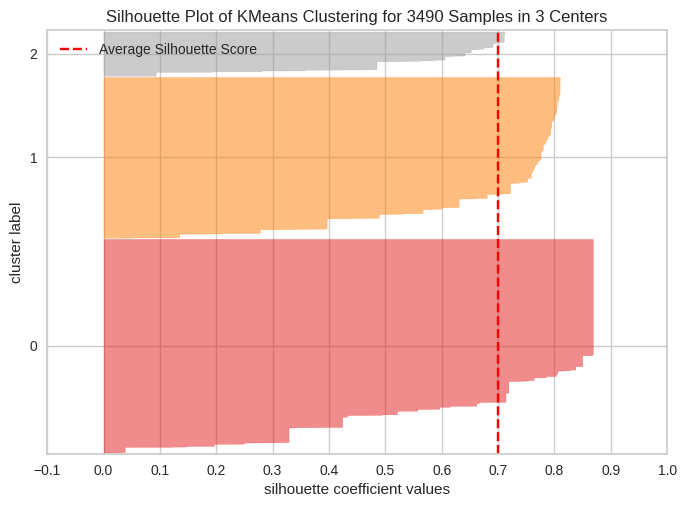

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3490 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.metrics import silhouette_score

# Assume df is your DataFrame

# Select relevant features for clustering
selected_features = df_merged[['budget', 'popularity', 'vote_average', 'vote_count']]

# Calculate Silhouette Score to evaluate clustering performance
silhouette_avg = silhouette_score(selected_features, df_merged['cluster'], metric='euclidean')

# Print the Silhouette Score
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Interpretation of Silhouette Score:
# - A Silhouette Score close to 1 indicates that examples are well matched to their own cluster and poorly matched to neighboring clusters.
# - A Silhouette Score around 0 indicates overlapping clusters.
# - A Silhouette Score close to -1 indicates that examples may be assigned to the wrong cluster.

# Visualize the Silhouette Plot (Optional)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the visualizer with the KMeans model
visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_k, random_state=42))

# Fit the data and visualize
visualizer.fit(selected_features)
visualizer.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Xác định số lượng cụm k
k = 3

# Sử dụng thuật toán Agglomerative Clustering với khoảng cách Euclidean
hierarchical_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')

# Áp dụng phân cụm vào các cột dữ liệu cụ thể (ví dụ: Administrative_Duration và ExitRates)
hierarchical_cluster.fit(df_merged[['budget', 'popularity']])

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

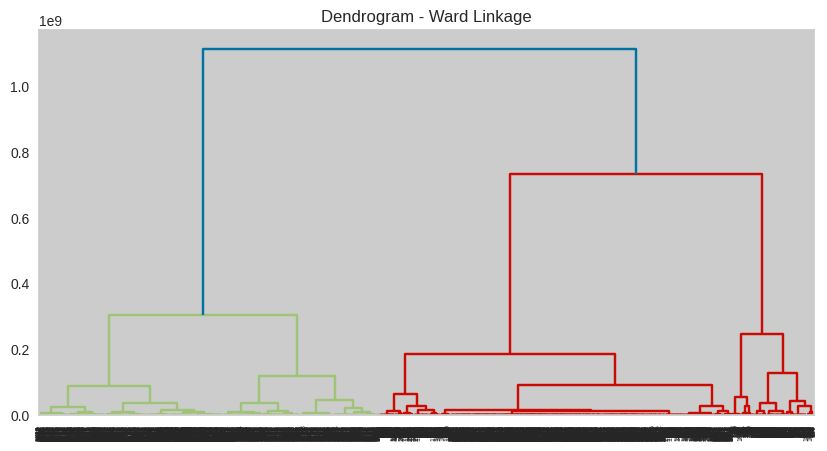

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hierarchy

# Tính toán và hiển thị Dendrogram với phương pháp Ward Linkage
plt.figure(figsize=(10, 5))
plt.title("Dendrogram - Ward Linkage")
linkage_ward = hierarchy.linkage(df_merged[['budget', 'popularity']], method='ward')
dendrogram_ward = hierarchy.dendrogram(linkage_ward)
plt.show()

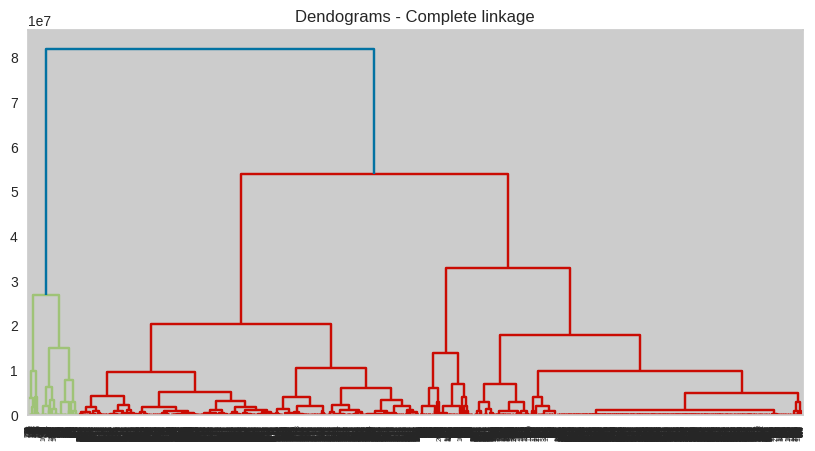

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Dendograms - Complete linkage")
linkage_complete = hierarchy.linkage(df_merged[['budget', 'popularity']], method='complete')
dendrogram_complete = hierarchy.dendrogram(linkage_complete)
plt.show()


In [ ]:
k = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(df_merged[['budget', 'popularity']])
labels = hierarchical_cluster.labels_
clustering = pd.concat([df_merged, pd.Series(labels, name='cluster')], axis=1)
print('Số phần tử của mỗi cluster:')
print(clustering.cluster.value_counts())

Số phần tử của mỗi cluster:
2.0    1590
0.0    1531
1.0     369
Name: cluster, dtype: int64


## Kiểm định giả thuyết

In [ ]:
from scipy.stats import pearsonr

# Loại bỏ các dòng có giá trị null trong 'budget' và 'revenue'
data_cleaned = df_merged.dropna(subset=['budget', 'revenue'])

# Kiểm tra tương quan Pearson giữa ngân sách và doanh thu
correlation, p_value = pearsonr(data_cleaned['budget'], data_cleaned['revenue'])

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

# Kiểm định giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Có mối quan hệ giữa ngân sách và doanh thu.")
else:
    print("Fail to reject the null hypothesis: Không có mối quan hệ giữa ngân sách và doanh thu.")


Correlation: 0.3498212651457064
P-value: 5.209900256459662e-101
Reject the null hypothesis: Có mối quan hệ giữa ngân sách và doanh thu.


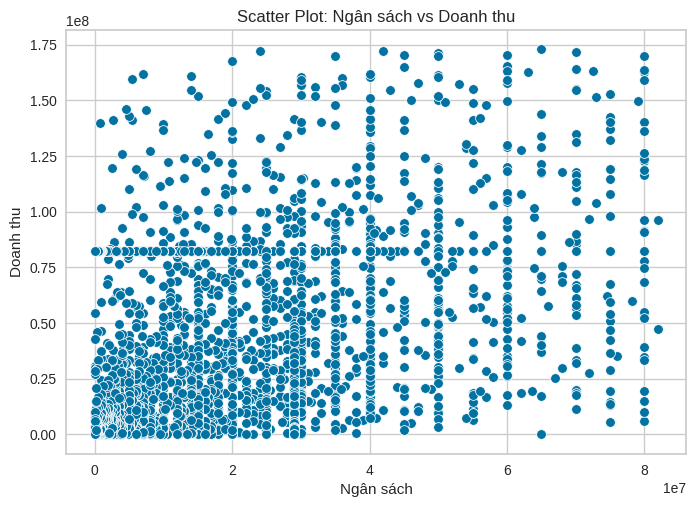

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ scatter plot cho ngân sách và doanh thu
sns.scatterplot(x='budget', y='revenue', data=data_cleaned)
plt.title('Scatter Plot: Ngân sách vs Doanh thu')
plt.xlabel('Ngân sách')
plt.ylabel('Doanh thu')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Tạo một DataFrame mới chỉ chứa cột 'genres' và 'vote_average'
genres_data = df_merged[['first_genre', 'vote_average']].dropna()

# Chia dữ liệu thành các nhóm theo thể loại phim
genre_groups = [group['vote_average'] for name, group in genres_data.groupby('first_genre')]

# Kiểm định ANOVA
f_statistic, p_value = f_oneway(*genre_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Kiểm định giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Có sự ảnh hưởng của thể loại phim đến điểm đánh giá trung bình.")
else:
    print("Fail to reject the null hypothesis: Không có sự ảnh hưởng của thể loại phim đến điểm đánh giá trung bình.")

F-statistic: 12.49465514871458
P-value: 3.1364310313328443e-38
Reject the null hypothesis: Có sự ảnh hưởng của thể loại phim đến điểm đánh giá trung bình.


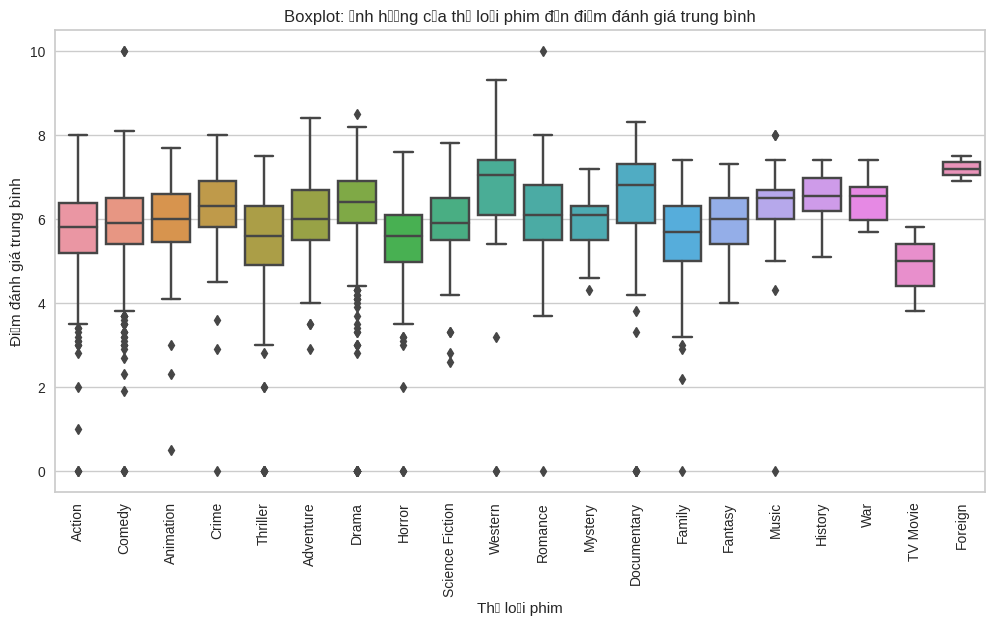

In [ ]:
# Biểu đồ boxplot cho điểm đánh giá trung bình theo thể loại phim
plt.figure(figsize=(12, 6))
sns.boxplot(x='first_genre', y='vote_average', data=genres_data)
plt.title('Boxplot: Ảnh hưởng của thể loại phim đến điểm đánh giá trung bình')
plt.xlabel('Thể loại phim')
plt.ylabel('Điểm đánh giá trung bình')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Chọn ngôn ngữ gốc bạn quan tâm (ví dụ: 'en' cho tiếng Anh)
language_data = movies[movies['original_language'] == 'en']

# Loại bỏ các dòng có giá trị null trong 'popularity'
language_data_cleaned = language_data.dropna(subset=['popularity'])

# Tạo một nhóm dữ liệu cho ngôn ngữ được chọn và một nhóm dữ liệu cho tất cả các ngôn ngữ khác
selected_language_popularity = language_data_cleaned['popularity']
other_languages_popularity = movies[~movies['original_language'].isin(['en'])]['popularity'].dropna()

# Kiểm định t-test
t_statistic, p_value = ttest_ind(selected_language_popularity, other_languages_popularity)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định giả thuyết
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Có sự ảnh hưởng của ngôn ngữ gốc đến độ phổ biến.")
else:
    print("Fail to reject the null hypothesis: Không có sự ảnh hưởng của ngôn ngữ gốc đến độ phổ biến.")

T-statistic: 4.737027020414849
P-value: 2.2552177448868414e-06
Reject the null hypothesis: Có sự ảnh hưởng của ngôn ngữ gốc đến độ phổ biến.


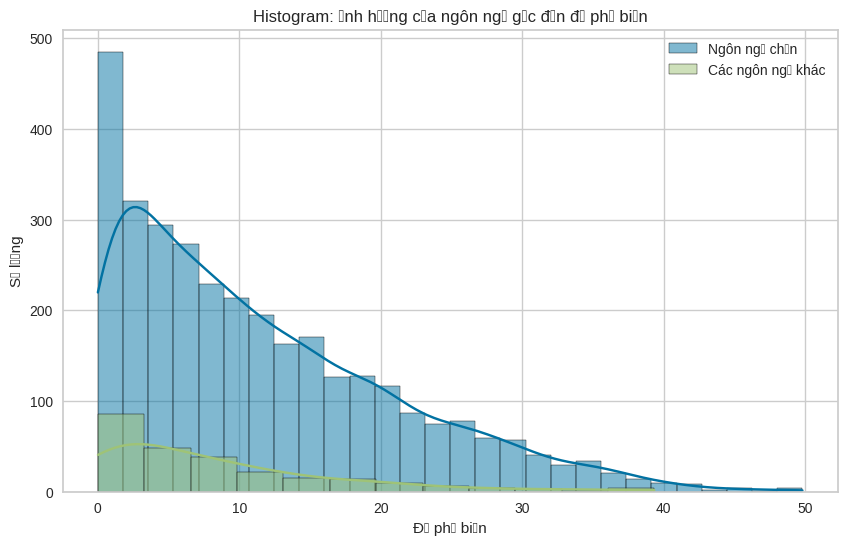

In [ ]:
# Biểu đồ histogram cho độ phổ biến theo ngôn ngữ gốc
plt.figure(figsize=(10, 6))
sns.histplot(selected_language_popularity, label='Ngôn ngữ chọn', kde=True)
sns.histplot(other_languages_popularity, label='Các ngôn ngữ khác', kde=True)
plt.title('Histogram: Ảnh hưởng của ngôn ngữ gốc đến độ phổ biến')
plt.xlabel('Độ phổ biến')
plt.ylabel('Số lượng')
plt.legend()
plt.show()